<a href="https://colab.research.google.com/github/Vo-Hao250604/Student-Habits-and-Academic-Performance-Analysis/blob/main/Student_Habits_and_Academic_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# chạy kết nối tới drive có sẵn data của Student

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1.Read Data




## 1.1 Import Data & Package


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
sns.set_style('ticks')  # cài style biểu đồ tối giản, gọn gàng
sns.set_palette('husl') # cài bảng màu tươi sáng, phân biệt rõ các nhóm
url = "https://raw.githubusercontent.com/Vo-Hao250604/Student-Habits-and-Academic-Performance-Analysis/main/enhanced_student_habits_performance_dataset.csv"
df = pd.read_csv(url)
# df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/enhanced_student_habits_performance_dataset.csv")
df

student_id  age  gender             major  study_hours_per_day  \
0          100000   26    Male  Computer Science             7.645367   
1          100001   28    Male              Arts             5.700000   
2          100002   17    Male              Arts             2.400000   
3          100003   27   Other        Psychology             3.400000   
4          100004   25  Female          Business             4.700000   
...           ...  ...     ...               ...                  ...   
79995      179995   16    Male       Engineering             3.700000   
79996      179996   16  Female          Business             1.200000   
79997      179997   26  Female              Arts             4.100000   
79998      179998   23   Other           Biology             3.800000   
79999      179999   25   Other       Engineering             3.000000   

       social_media_hours  netflix_hours part_time_job  attendance_percentage  \
0                     3.0            0.1           Yes                   70.3   
1                     0.5            0.4            No                   88.4   
2                     4.2            0.7            No                   82.1   
3                     4.6            2.3           Yes                   79.3   
4                     0.8            2.7           Yes                   62.9   
...                   ...            ...           ...                    ...   
79995                 2.1            1.0           Yes                   80.8   
79996                 0.4            2.9            No                   99.5   
79997                 1.6            1.6           Yes                   46.1   
79998                 0.6            3.5           Yes                   58.7   
79999                 4.5            3.4           Yes                   97.7   

       sleep_hours  ... screen_time  study_environment access_to_tutoring  \
0              6.2  ...        10.9  Co-Learning Group                Yes   
1              7.2  ...         8.3  Co-Learning Group                Yes   
2              9.2  ...         8.0            Library                Yes   
3              4.2  ...        11.7  Co-Learning Group                Yes   
4              6.5  ...         9.4         Quiet Room                Yes   
...            ...  ...         ...                ...                ...   
79995          6.1  ...         8.3            Library                 No   
79996          4.1  ...         4.7  Co-Learning Group                 No   
79997          8.3  ...         7.5               Dorm                 No   
79998          5.8  ...         9.3         Quiet Room                Yes   
79999          5.3  ...        12.2  Co-Learning Group                Yes   

      family_income_range  parental_support_level motivation_level  \
0                    High                       9                7   
1                     Low                       7                2   
2                    High                       3                9   
3                     Low                       5                3   
4                  Medium                       9                1   
...                   ...                     ...              ...   
79995                 Low                       1                4   
79996                 Low                       3                2   
79997              Medium                       7                1   
79998                 Low                       2                8   
79999              Medium                       1                8   

       exam_anxiety_score  learning_style  time_management_score exam_score  
0                       8         Reading                    3.0        100  
1                      10         Reading                    6.0         99  
2                       6     Kinesthetic                    7.6         98  
3                      10         Reading                    3.2        100  
4

## 1.2 Data dictionary

In [61]:
df.columns

Index(['student_id', 'age', 'gender', 'major', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'previous_gpa',
       'semester', 'stress_level', 'dropout_risk', 'social_activity',
       'screen_time', 'study_environment', 'access_to_tutoring',
       'family_income_range', 'parental_support_level', 'motivation_level',
       'exam_anxiety_score', 'learning_style', 'time_management_score',
       'exam_score'],
      dtype='object')



```
student_id: Mã định danh duy nhất của học sinh.
age: Độ tuổi của học sinh (16–28).
gender: Nam, Nữ hoặc Khác.
major: Lĩnh vực nghiên cứu (ví dụ: Khoa học máy tính, Kỹ thuật, Nghệ thuật).
study_hours_per_day: Số giờ học trung bình mỗi ngày.
social_media_hours, netflix_hours, screen_time: Thời gian sử dụng nhiều màn hình khác nhau.
part_time_job: Học sinh có việc làm hay không (Có/Không).
attendance_percentage: Tỷ lệ đi học theo phần trăm.
sleep_hours, exercise_frequency, diet_quality: Các yếu tố lối sống.
mental_health_rating, stress_level, exam_anxiety_score: Các chỉ số tâm lý (1–10).
extracurricular_participation, access_to_tutoring: Hỗ trợ và tương tác.
family_income_range, parental_support_level, parental_education_level: Bối cảnh và hỗ trợ.
motivation_level, time_management_score: Kỹ năng tự quản lý (1–10).
learning_style: Phương pháp học tập được ưa thích.
study_environment: Địa điểm chung để học tập.
dropout_risk: Có/Không — xuất phát từ mức độ căng thẳng và động lực.
previous_gpa, exam_score: Chỉ số hiệu suất mục tiêu.
```





#2.Data Quality

In [22]:
df.isnull().sum()

student_id                       0
age                              0
gender                           0
major                            0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
previous_gpa                     0
semester                         0
stress_level                     0
dropout_risk                     0
social_activity                  0
screen_time                      0
study_environment                0
access_to_tutoring               0
family_income_range              0
parental_support_level           0
motivation_level                 0
exam_anxiety_score               0
learning_style                   0
time_management_score            0
exam_score                       0
dtype: int64

#3.EDA

##3.1 Kiểm tra Dữ liệu

In [23]:
df.shape

(80000, 31)

In [24]:
#Thông tin cột
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     80000 non-null  int64  
 1   age                            80000 non-null  int64  
 2   gender                         80000 non-null  object 
 3   major                          80000 non-null  object 
 4   study_hours_per_day            80000 non-null  float64
 5   social_media_hours             80000 non-null  float64
 6   netflix_hours                  80000 non-null  float64
 7   part_time_job                  80000 non-null  object 
 8   attendance_percentage          80000 non-null  float64
 9   sleep_hours                    80000 non-null  float64
 10  diet_quality                   80000 non-null  object 
 11  exercise_frequency             80000 non-null  int64  
 12  parental_education_level       80000 non-null 

In [25]:
#Thông số của dataset
print("Data describe: ")
cm = sns.light_palette("green", as_cmap=True)
display(df.describe().T.style.background_gradient(cmap=cm))

Data describe: 


Sau khi xem qua bảng thống kê, có thể thấy dữ liệu nói về một nhóm sinh viên đại học với các thông tin từ độ tuổi, thói quen học tập, sinh hoạt cho đến tâm lý và kết quả thi.

Trung bình, sinh viên trong nhóm này khoảng 22 tuổi, phổ biến nhất là từ 19 - 25 tuổi. Về việc học, mỗi ngày các sinh viên dành khoảng 4 tiếng để học, nhưng cũng có bạn học rất ít hoặc thậm chí là không học tí nào trong ngày. Trong khi đó, thời gian lướt mạng xã hội khoảng 2 tiếng rưỡi, còn xem Netflix thì trung bình tầm 2 tiếng - tức là cũng không quá nhiều so với tưởng tượng.

Tỷ lệ đi học thì có vẻ hơi dao động. Trung bình sinh viên đi học khoảng 70% số buổi, nhưng có sinh viên chỉ đi khoảng 40%, trong khi người chăm nhất thì đủ 100%. Giấc ngủ nhìn chung khá ổn - trung bình 7 tiếng mỗi đêm, phần lớn mọi người đi ngủ 6-8 tiếng, tức là không quá thiểu ngủ, nhưng cũng chưa hẳn là lý tưởng với tất cả sinh viên.

Về việc tập thể dục thì không đều lắm. Có bạn siêng năng, có bạn không tập gì. Trung bình mỗi người tập khoảng 3 đến 4 lần mỗi tuần. Còn khi tự đánh giá sức khỏe tinh thần, các bạn thường cho mình điểm 6 - 7 trên thang 10, tức là cảm thấy khá ổn.

Điểm GPA trung bình trước đây cũng khá cao - khoảng 3.6/4.0, cho thấy đây là một nhóm sinh viên có năng lực học tập tốt. Về mặt tinh thần, mức độ căng thẳng cũng ở mức vừa phải, tầm 5 điểm, còn hoạt động xã hội thì không quá nổi bật, trung bình khoảng 2,5/5 điểm.

Điều đáng chú ý là thời gian nhìn màn hình mỗi ngày khá nhiều - gần 10 tiếng, chắc là bao gồm học online, lướt mạng, giải trí,... Sự hỗ trợ từ gia đình, động lực học tập và khả năng quản lý thời gian thì mỗi người mỗi kiểu, nhưng điểm trung bình đều quanh mức 5 đến 6.

Một điểm nổi bật nữa là rất nhiều bạn bị lo lắng khi thi - điểm lo lắng trung bình tận 8,5/10, có không ít bạn đạt mức lo lắng cao nhất. Tuy vậy, kết quả thi lại rất ấn tượng: điểm trung bình lên đến 89 điểm, nhiều bạn đạt từ 82 - 100 điểm, cho thấy đa phần đều học tốt và đạt kết quả cao.


In [ ]:
#5 dòng đầu tiên
df.head(5)

student_id  age  gender             major  study_hours_per_day  \
0      100000   26    Male  Computer Science             7.645367   
1      100001   28    Male              Arts             5.700000   
2      100002   17    Male              Arts             2.400000   
3      100003   27   Other        Psychology             3.400000   
4      100004   25  Female          Business             4.700000   

   social_media_hours  netflix_hours part_time_job  attendance_percentage  \
0                 3.0            0.1           Yes                   70.3   
1                 0.5            0.4            No                   88.4   
2                 4.2            0.7            No                   82.1   
3                 4.6            2.3           Yes                   79.3   
4                 0.8            2.7           Yes                   62.9   

   sleep_hours  ... screen_time  study_environment access_to_tutoring  \
0          6.2  ...        10.9  Co-Learning Group                Yes   
1          7.2  ...         8.3  Co-Learning Group                Yes   
2          9.2  ...         8.0            Library                Yes   
3          4.2  ...        11.7  Co-Learning Group                Yes   
4          6.5  ...         9.4         Quiet Room                Yes   

  family_income_range  parental_support_level motivation_level  \
0                High                       9                7   
1                 Low                       7                2   
2                High                       3                9   
3                 Low                       5                3   
4              Medium                       9                1   

   exam_anxiety_score  learning_style  time_management_score exam_score  
0                   8         Reading                    3.0        100  
1                  10         Reading                    6.0         99  
2                   6     Kinesthetic                    7.6         98  
3                  10         Reading                    3.2        100  
4                  10         Reading                    7.1         98  

[5 rows x 31 columns]

##3.2 Phân tích Đơn biến

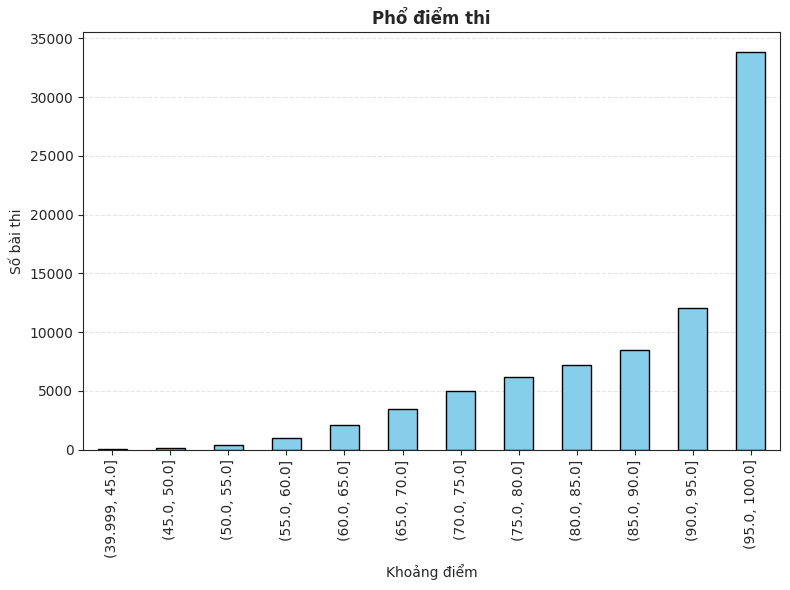

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Biểu đồ điểm thi
bins = np.arange(40,101,5)
pho_exam_score = df['exam_score'].value_counts(bins=bins).sort_index()

pho_exam_score.plot(kind='bar', figsize=(8,6), color='skyblue', edgecolor='black')
plt.title("Phổ điểm thi", fontweight='bold')
plt.xlabel("Khoảng điểm")
plt.ylabel("Số bài thi")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

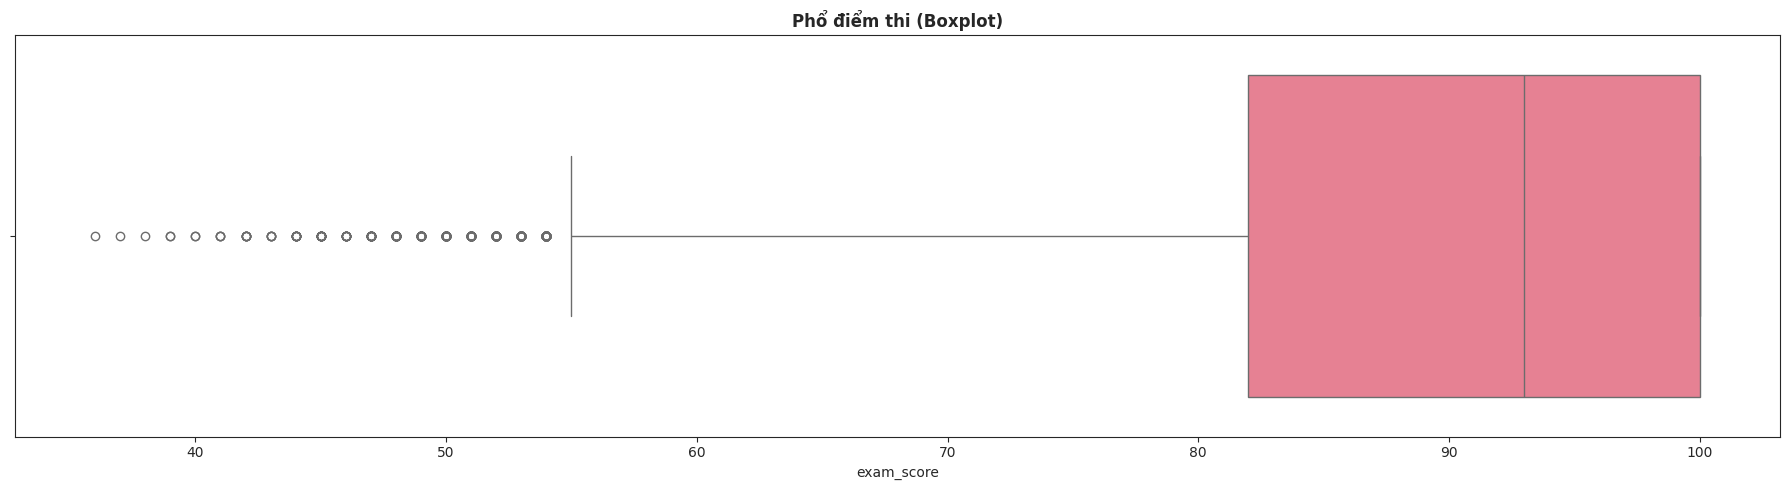

In [ ]:
#Boxplot điểm thi
plt.subplots(figsize=(18, 5))
sns.boxplot(data=df['exam_score'], orient='h')
plt.title("Phổ điểm thi (Boxplot)", fontweight='bold')
plt.tight_layout()
plt.show()

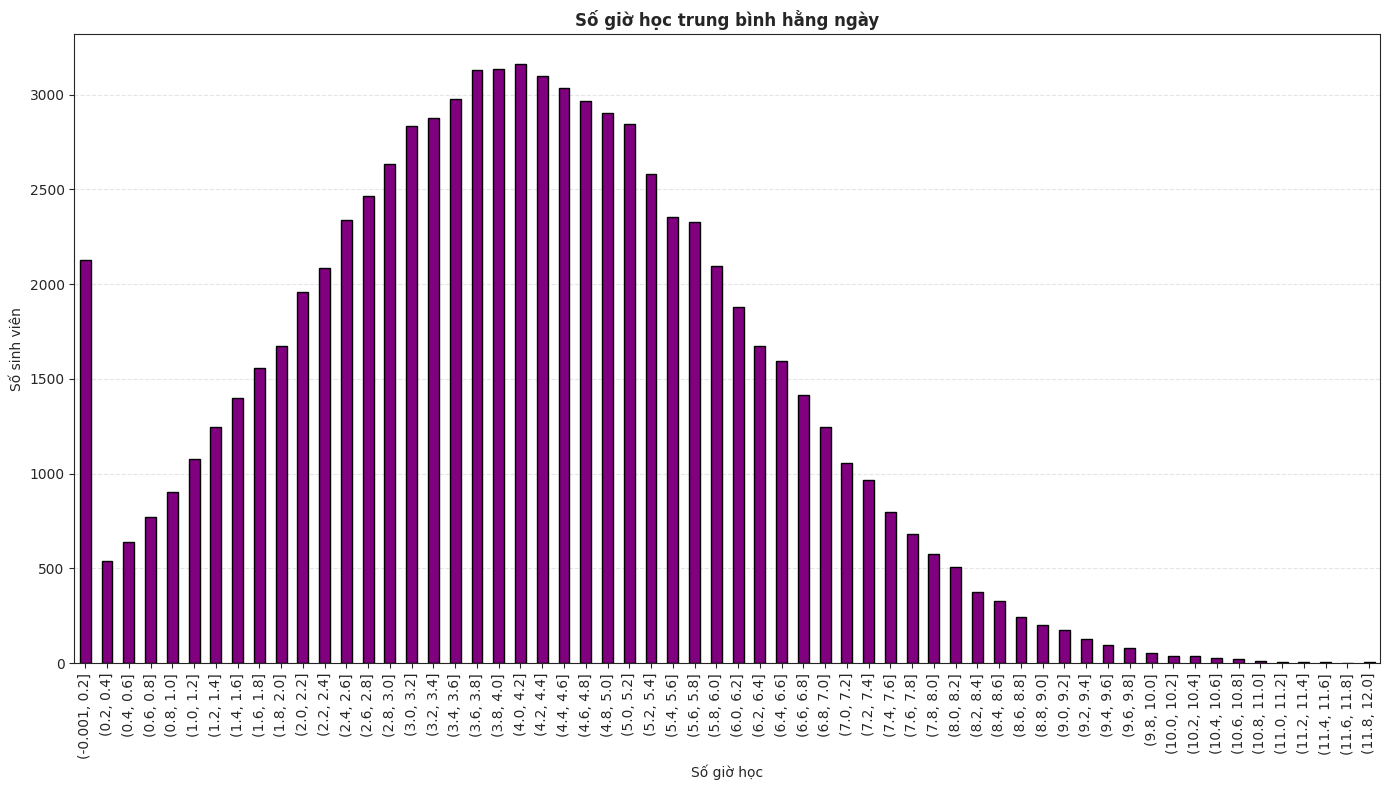

In [ ]:
#Biểu đồ số giờ học trung bình hằng ngày
bins = np.arange(0,12.2,0.2)
pho_study_hours_per_day = df['study_hours_per_day'].value_counts(bins=bins).sort_index()

pho_study_hours_per_day.plot(kind='bar', figsize=(14,8), color="purple", edgecolor="black")
plt.title("Số giờ học trung bình hằng ngày", fontweight='bold')
plt.xlabel("Số giờ học")
plt.ylabel("Số sinh viên")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

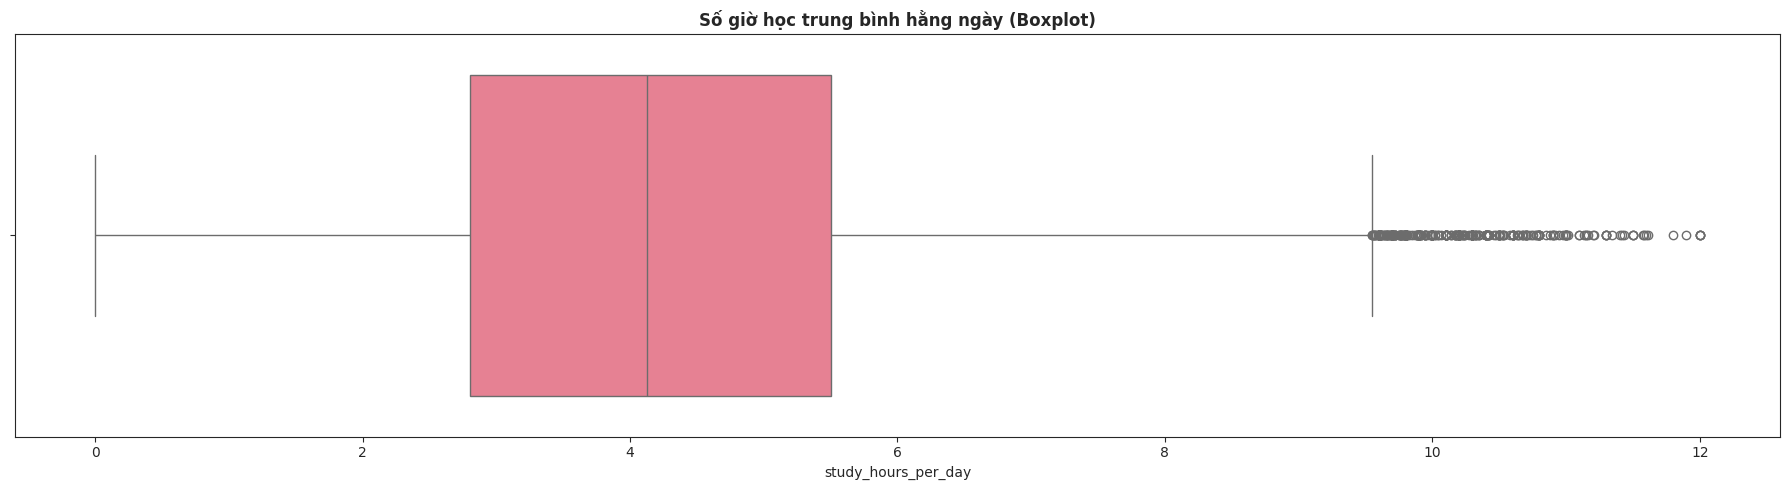

In [ ]:
#Boxplot số giờ học trung bình hằng ngày
plt.subplots(figsize=(18, 5))
sns.boxplot(data=df['study_hours_per_day'], orient='h')
plt.title("Số giờ học trung bình hằng ngày (Boxplot)", fontweight='bold')
plt.tight_layout()
plt.show()

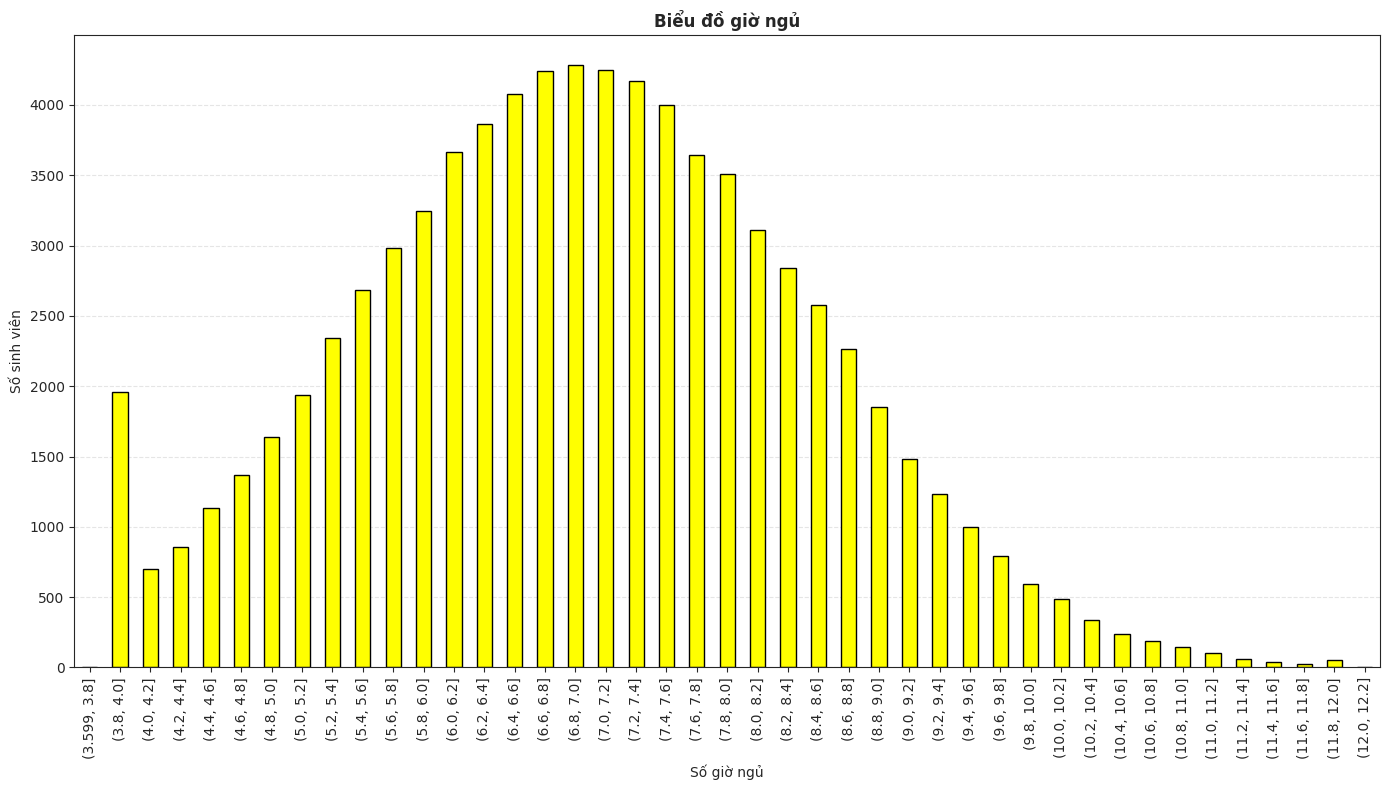

In [ ]:
#Biểu đồ số giờ ngủ
bins = np.arange(3.6,12.4,0.2)
pho_sleep_hours = df['sleep_hours'].value_counts(bins=bins).sort_index()

pho_sleep_hours.plot(kind='bar', figsize=(14,8), color="yellow", edgecolor="black")
plt.title("Biểu đồ giờ ngủ", fontweight='bold')
plt.xlabel("Số giờ ngủ")
plt.ylabel("Số sinh viên")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

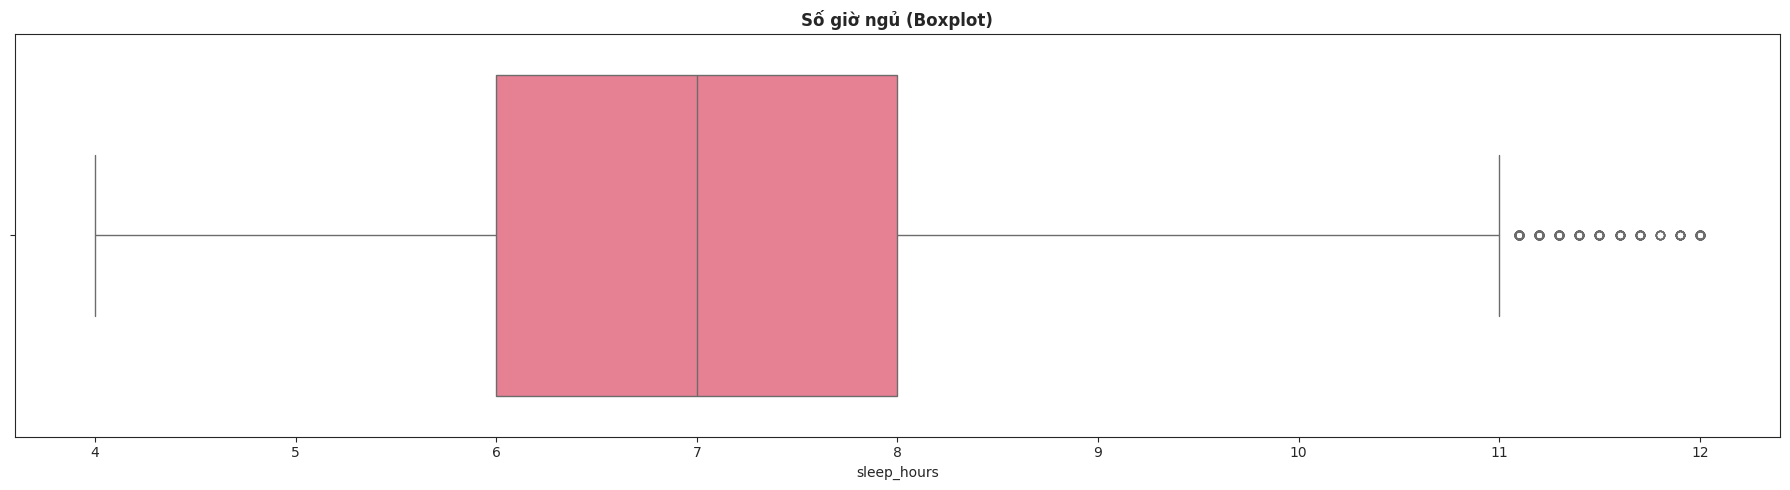

In [ ]:
#Boxplot số số giờ ngủ
plt.subplots(figsize=(18, 5))
sns.boxplot(data=df['sleep_hours'], orient='h')
plt.title("Số giờ ngủ (Boxplot)", fontweight='bold')
plt.tight_layout()
plt.show()

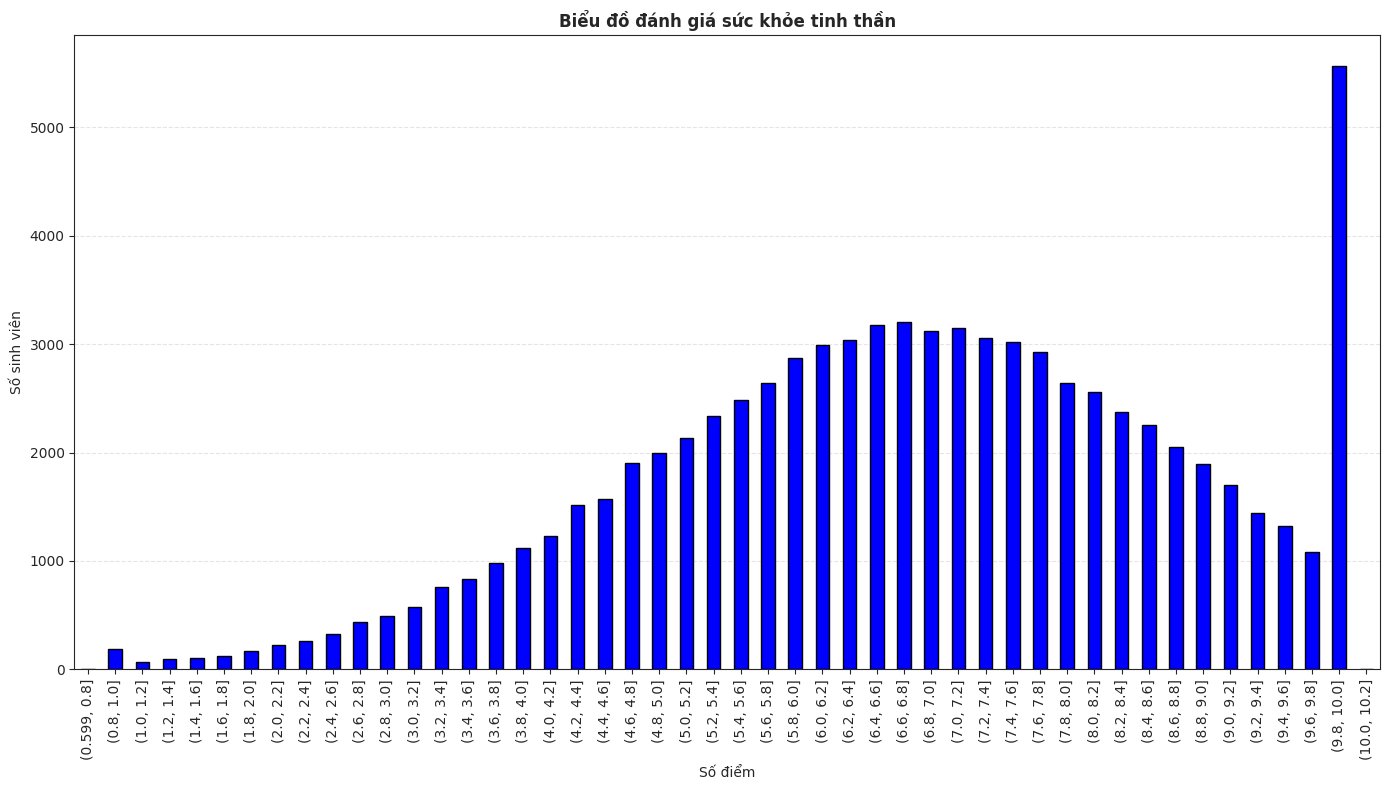

In [ ]:
#Biểu đồ đánh giá sức khỏe tinh thần
bins = np.arange(0.6,10.4,0.2)
pho_mental_health_rating = df['mental_health_rating'].value_counts(bins=bins).sort_index()

pho_mental_health_rating.plot(kind='bar', figsize=(14,8), color="blue", edgecolor="black")
plt.title("Biểu đồ đánh giá sức khỏe tinh thần", fontweight='bold')
plt.xlabel("Số điểm")
plt.ylabel("Số sinh viên")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

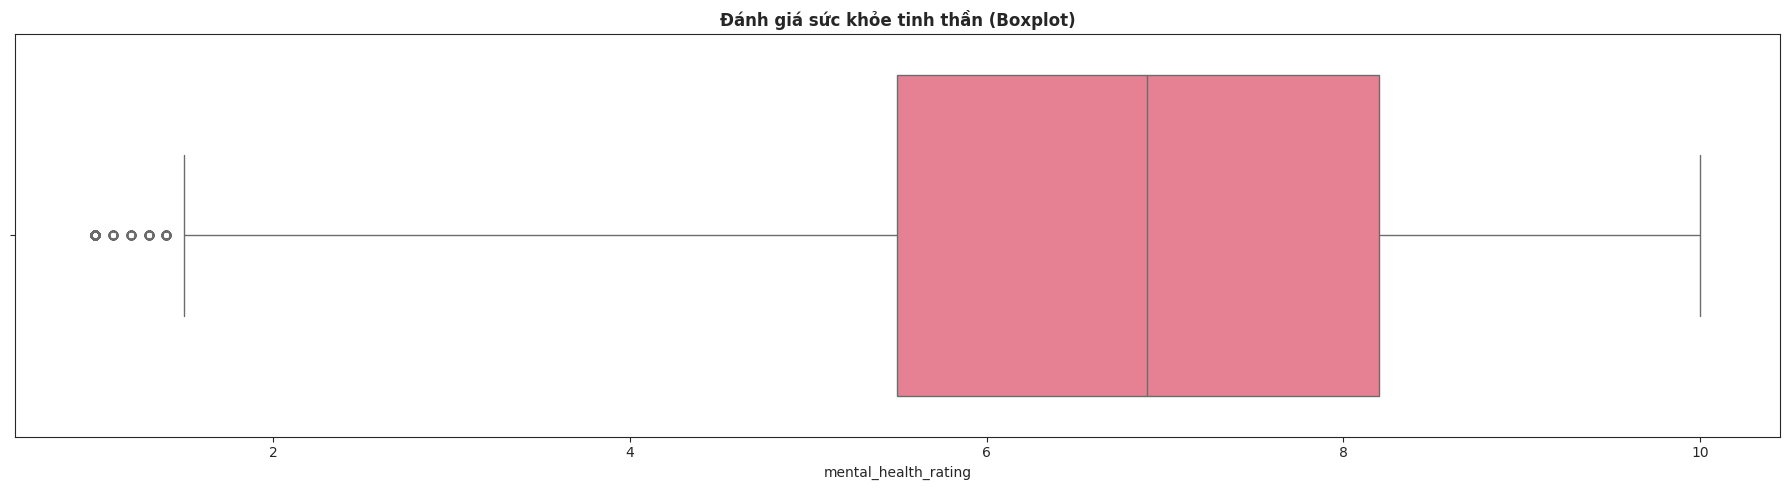

In [ ]:
#Boxplot đánh giá sức khỏe tinh thần
plt.subplots(figsize=(18, 5))
sns.boxplot(data=df['mental_health_rating'], orient='h')
plt.title("Đánh giá sức khỏe tinh thần (Boxplot)", fontweight='bold')
plt.tight_layout()
plt.show()

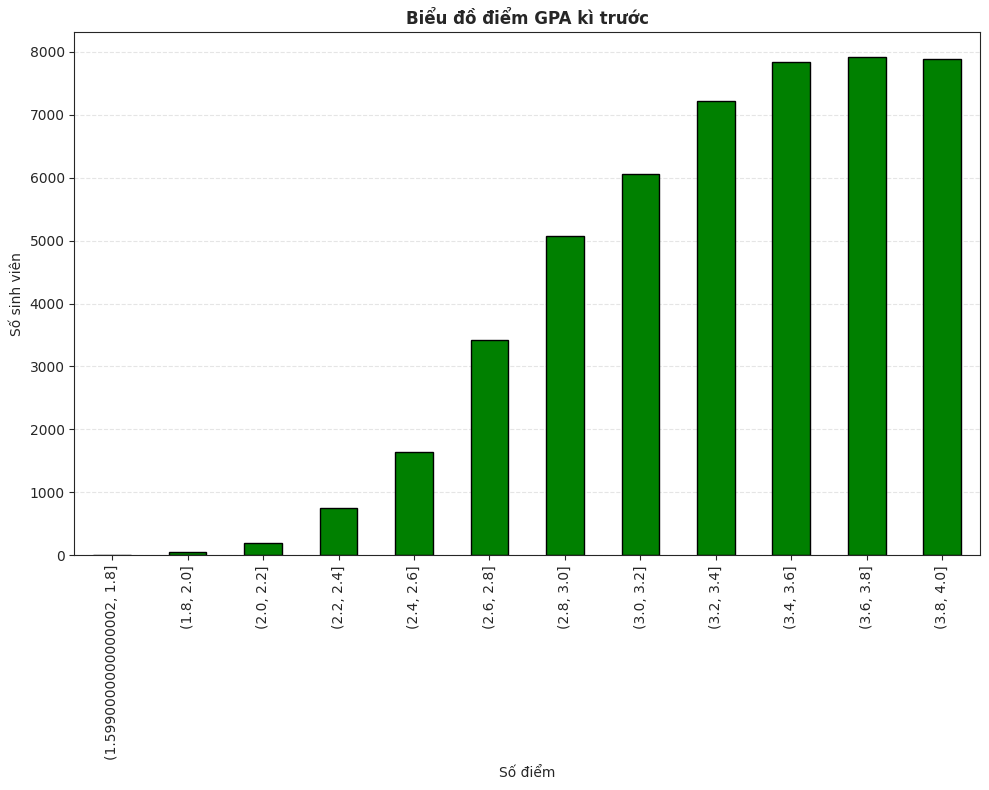

In [ ]:
#Biểu đồ điểm GPA kì trước
bins = np.arange(1.6,4.2,0.2)
pho_previous_gpa = df['previous_gpa'].value_counts(bins=bins).sort_index()

pho_previous_gpa.plot(kind='bar', figsize=(10,8), color="green", edgecolor="black")
plt.title("Biểu đồ điểm GPA kì trước", fontweight='bold')
plt.xlabel("Số điểm")
plt.ylabel("Số sinh viên")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

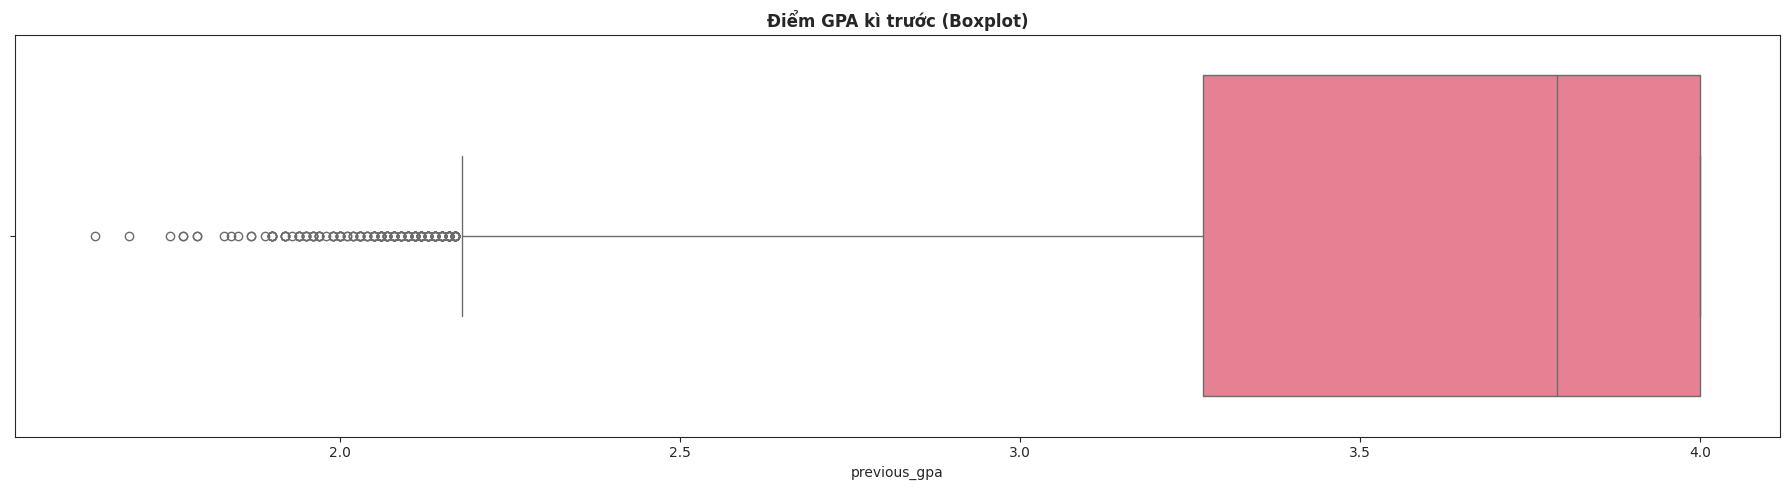

In [ ]:
#Boxplot điểm GPA kì trước
plt.subplots(figsize=(18, 5))
sns.boxplot(data=df['previous_gpa'], orient='h')
plt.title("Điểm GPA kì trước (Boxplot)", fontweight='bold')
plt.tight_layout()
plt.show()

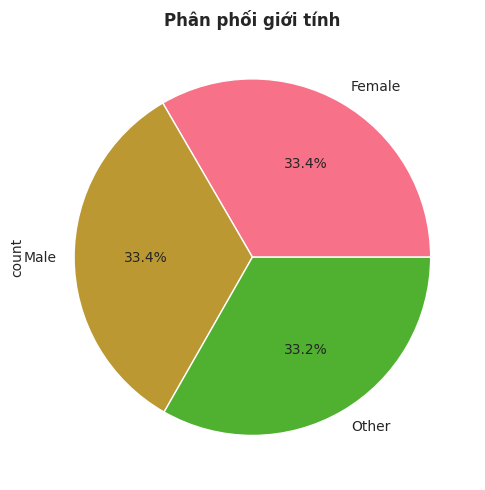

In [ ]:
#Giới tính
plt.subplots(figsize=(18, 5))
df['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Phân phối giới tính', fontweight='bold')
plt.tight_layout()
plt.show()

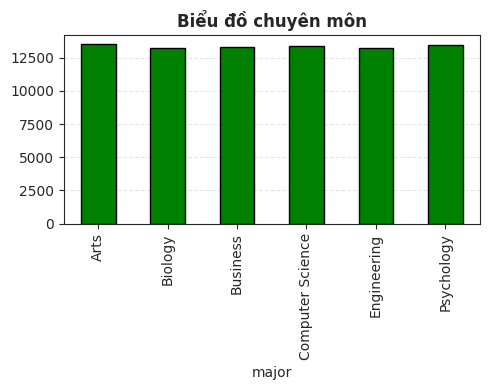

In [ ]:
#Biểu đồ chuyên môn
df['major'].value_counts().sort_index().plot(kind='bar', figsize=(5, 4), color="green", edgecolor="black")
plt.title('Biểu đồ chuyên môn', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

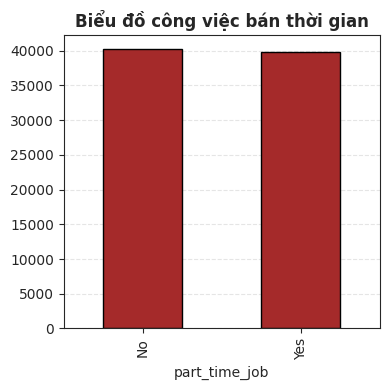

In [ ]:
#Biểu đồ công việc bán thời gian
df['part_time_job'].value_counts().sort_index().plot(kind='bar', figsize=(4, 4), color="brown", edgecolor="black")
plt.title('Biểu đồ công việc bán thời gian', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

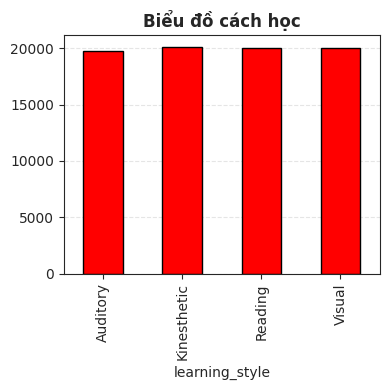

In [ ]:
#Biểu đồ cách học
df['learning_style'].value_counts().sort_index().plot(kind='bar', figsize=(4, 4), color="red", edgecolor="black")
plt.title('Biểu đồ cách học', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

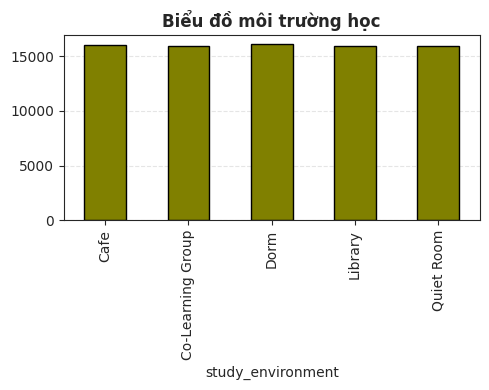

In [ ]:
#Biểu đồ môi trường học
df['study_environment'].value_counts().sort_index().plot(kind='bar', figsize=(5, 4), color="olive", edgecolor="black")
plt.title('Biểu đồ môi trường học', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

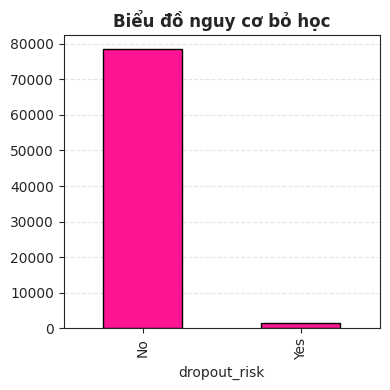

In [ ]:
#dropout_risk
df['dropout_risk'].value_counts().sort_index().plot(kind='bar', figsize=(4, 4), color="deeppink", edgecolor="black")
plt.title('Biểu đồ nguy cơ bỏ học', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

##3.3 Phân tích Hai biến (Bivariate Analysis)

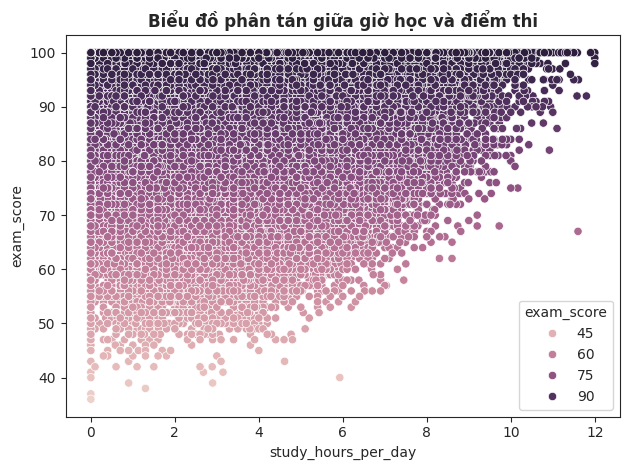

In [ ]:
#Biểu đồ phân tán giữa giờ học và điểm thi
sns.scatterplot(x=df['study_hours_per_day'], y=df['exam_score'], data=df, hue='exam_score')
plt.title("Biểu đồ phân tán giữa giờ học và điểm thi", fontweight='bold')
plt.tight_layout()
plt.show()

/tmp/ipython-input-25-2518716546.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stress_category', y='exam_score', data=df_stress, palette='viridis')


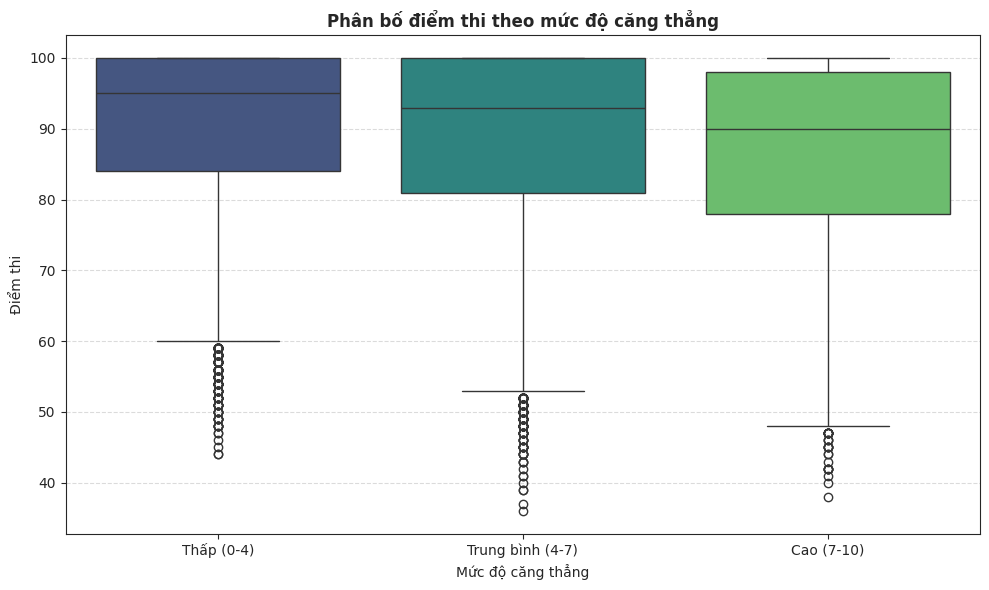

In [ ]:
#Phân bố điểm thi theo mức độ căng thẳng
df_stress = df.copy() #gán cái biến khác để test
df_stress['stress_category'] = pd.cut(df_stress['stress_level'], bins=[0, 4, 7, 10], labels=['Thấp (0-4)', 'Trung bình (4-7)', 'Cao (7-10)'])

# Tạo boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='stress_category', y='exam_score', data=df_stress, palette='viridis')

# Thiết lập tiêu đề và nhãn
plt.title('Phân bố điểm thi theo mức độ căng thẳng', fontweight='bold')
plt.xlabel('Mức độ căng thẳng')
plt.ylabel('Điểm thi')
plt.xticks()
plt.yticks()

# Hiển thị grid
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipython-input-26-1161618059.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='exam_score', data=df, palette='pastel')


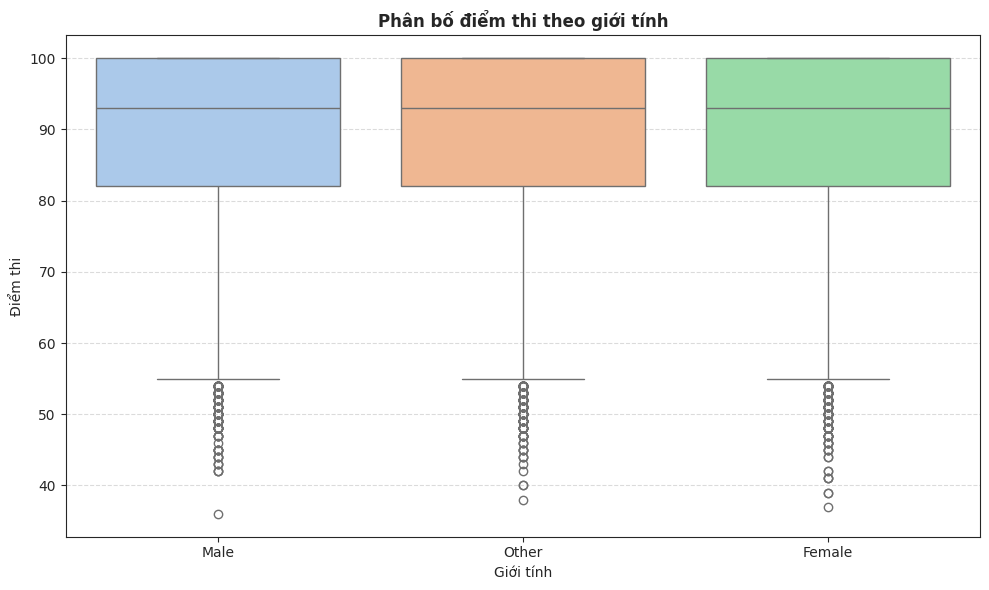

In [ ]:
#Phân bố điểm thi theo giới tính
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='exam_score', data=df, palette='pastel')
plt.title('Phân bố điểm thi theo giới tính', fontweight='bold')
plt.xlabel('Giới tính')
plt.ylabel('Điểm thi')
plt.xticks()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipython-input-27-3666435240.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='major', y='exam_score', data=df, palette='pastel')


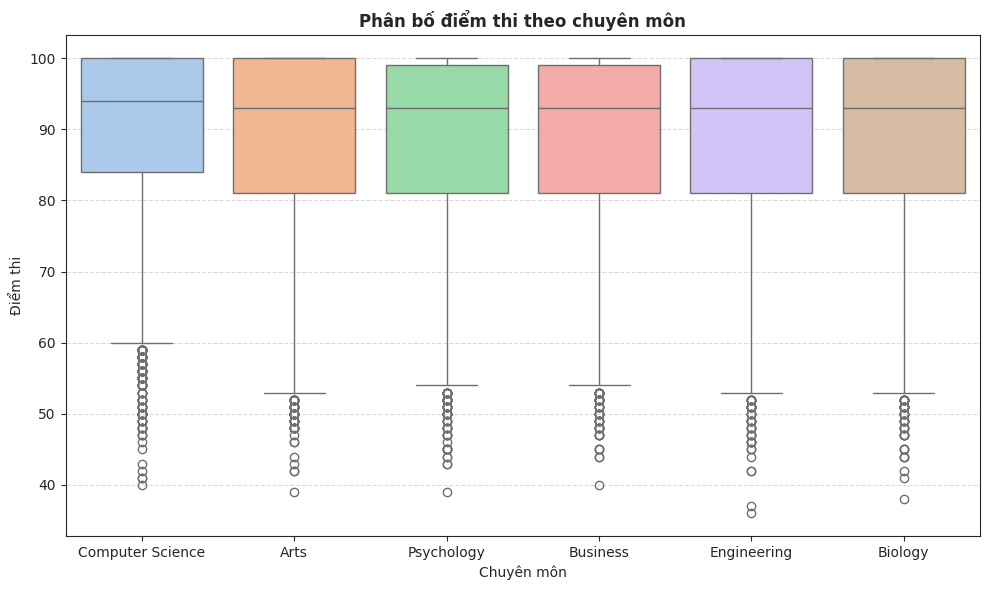

In [ ]:
#Phân bố điểm thi theo chuyên môn
plt.figure(figsize=(10, 6))
sns.boxplot(x='major', y='exam_score', data=df, palette='pastel')
plt.title('Phân bố điểm thi theo chuyên môn', fontweight='bold')
plt.xlabel('Chuyên môn')
plt.ylabel('Điểm thi')
plt.xticks()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipython-input-28-2817974674.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='dropout_risk', y='exam_score', palette='pastel')


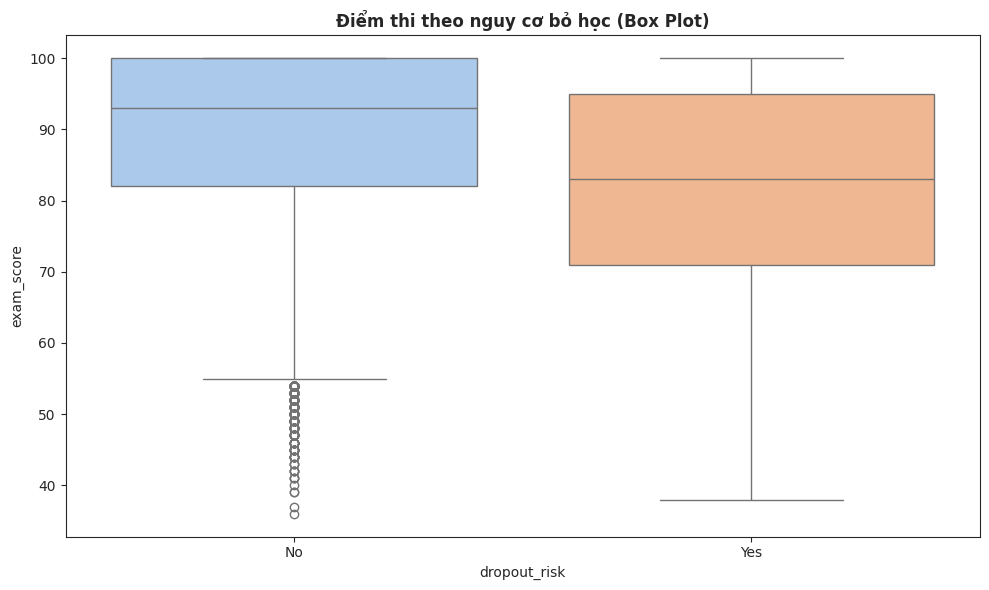

In [ ]:
#Điểm thi theo nguy cơ bỏ học (Box Plot)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='dropout_risk', y='exam_score', palette='pastel')
plt.title('Điểm thi theo nguy cơ bỏ học (Box Plot)', fontweight='bold')
plt.tight_layout()
plt.show()

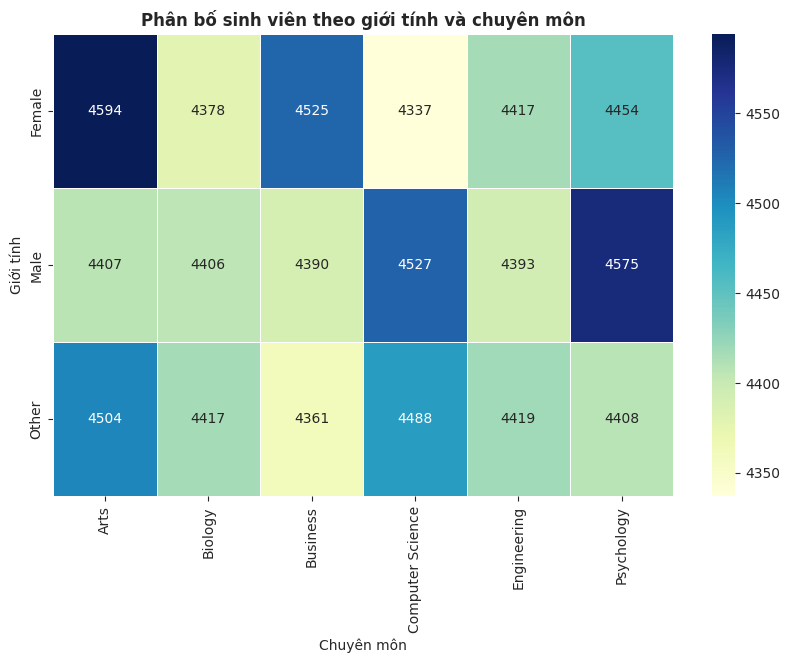

In [ ]:
#Bảng chéo giữa giới tính và chuyên môn
plt.figure(figsize=(10, 6))
sns.heatmap(
    pd.crosstab(df['gender'], df['major']),
    annot=True,      #Hiển thị giá trị
    fmt='d',         #Định dạng số nguyên
    cmap='YlGnBu',   #Màu sắc
    linewidths=0.5
)
plt.title('Phân bố sinh viên theo giới tính và chuyên môn', fontweight='bold')
plt.xlabel('Chuyên môn')
plt.ylabel('Giới tính')
plt.show()

##3.4 Ma trận tương quan

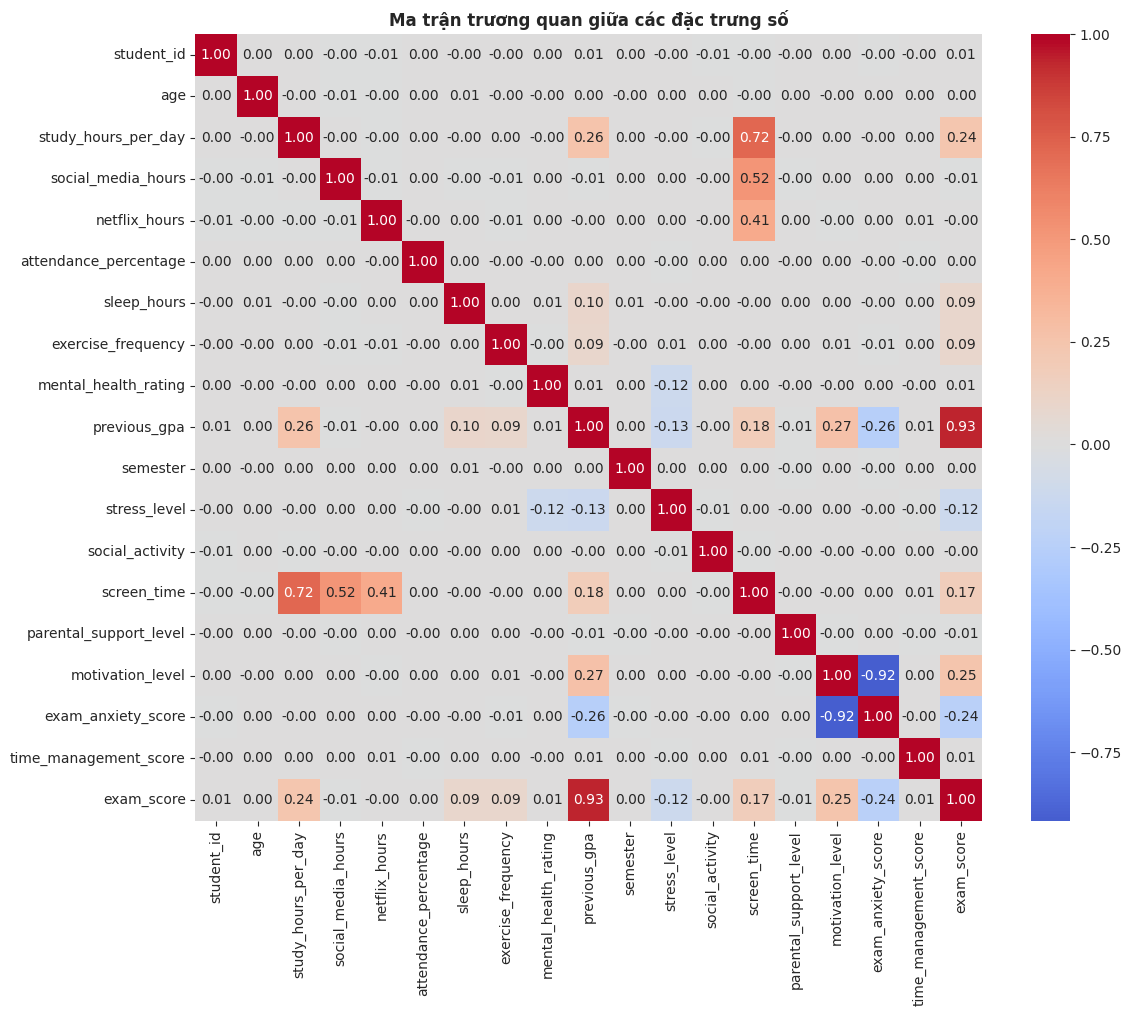

In [62]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12, 10))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', square=True)
plt.title('Ma trận trương quan giữa các đặc trưng số', fontweight='bold')
plt.tight_layout()
plt.show()

In [63]:
print(f"\nTop correlations with exam_score:")
print(df[numerical_cols].corr()['exam_score'].sort_values(ascending=False))


Top correlations with exam_score:
exam_score                1.000000
previous_gpa              0.932940
motivation_level          0.250287
study_hours_per_day       0.241460
screen_time               0.169788
sleep_hours               0.090820
exercise_frequency        0.086983
mental_health_rating      0.010556
student_id                0.007557
time_management_score     0.005940
attendance_percentage     0.002876
semester                  0.000541
age                       0.000487
netflix_hours            -0.001271
social_activity          -0.002795
parental_support_level   -0.006333
social_media_hours       -0.006351
stress_level             -0.118550
exam_anxiety_score       -0.235909
Name: exam_score, dtype: float64


#4.Data Preprocessing



```
- Trình bày các bước đã thực hiện: làm sạch dữ liệu (handling missing values, outliers), chuẩn hóa (normalization), biến đổi (transformation).

- Trình bày lý do lựa chọn từng kỹ thuật.
```




## 4.1 Làm sạch dữ liệu (Handling missing values, Outliers)

###4.1.1 Xử lý giá trị bị thiếu (Missing Values)

In [64]:
missing_vals = df.isnull().sum()
if missing_vals.sum() > 0:
    print(f"\nMissing Values: {missing_vals[missing_vals > 0]}")
else:
    print("No missing values found!")

No missing values found!




```
Do không có giá trị bị thiếu nên ta sẽ bỏ qua bước xử lý này
```



In [65]:
# Remove the unnecessary features
df.drop(['student_id', 'gender', 'internet_quality', 'learning_style'], axis=1, inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            80000 non-null  int64  
 1   major                          80000 non-null  object 
 2   study_hours_per_day            80000 non-null  float64
 3   social_media_hours             80000 non-null  float64
 4   netflix_hours                  80000 non-null  float64
 5   part_time_job                  80000 non-null  object 
 6   attendance_percentage          80000 non-null  float64
 7   sleep_hours                    80000 non-null  float64
 8   diet_quality                   80000 non-null  object 
 9   exercise_frequency             80000 non-null  int64  
 10  parental_education_level       80000 non-null  object 
 11  mental_health_rating           80000 non-null  float64
 12  extracurricular_participation  80000 non-null 

###4.1.2 Xử lý giá trị ngoại lai (Outlier)

Ép kiểu dữ liệu vài thuộc tính để vẽ biểu đồ boxplot

In [67]:
df = df.astype({
    'study_hours_per_day': 'int',
    'social_media_hours': 'int',
    'netflix_hours': 'int',
    'attendance_percentage': 'int',
    'sleep_hours': 'int',
    'mental_health_rating': 'int',
    'previous_gpa': 'int',
    'stress_level': 'int',
    'screen_time': 'int',
    'time_management_score': 'int'
})
df.dtypes

age                               int64
major                            object
study_hours_per_day               int64
social_media_hours                int64
netflix_hours                     int64
part_time_job                    object
attendance_percentage             int64
sleep_hours                       int64
diet_quality                     object
exercise_frequency                int64
parental_education_level         object
mental_health_rating              int64
extracurricular_participation    object
previous_gpa                      int64
semester                          int64
stress_level                      int64
dropout_risk                     object
social_activity                   int64
screen_time                       int64
study_environment                object
access_to_tutoring               object
family_income_range              object
parental_support_level            int64
motivation_level                  int64
exam_anxiety_score                int64
time_management_score             int64
exam_score                        int64
dtype: object

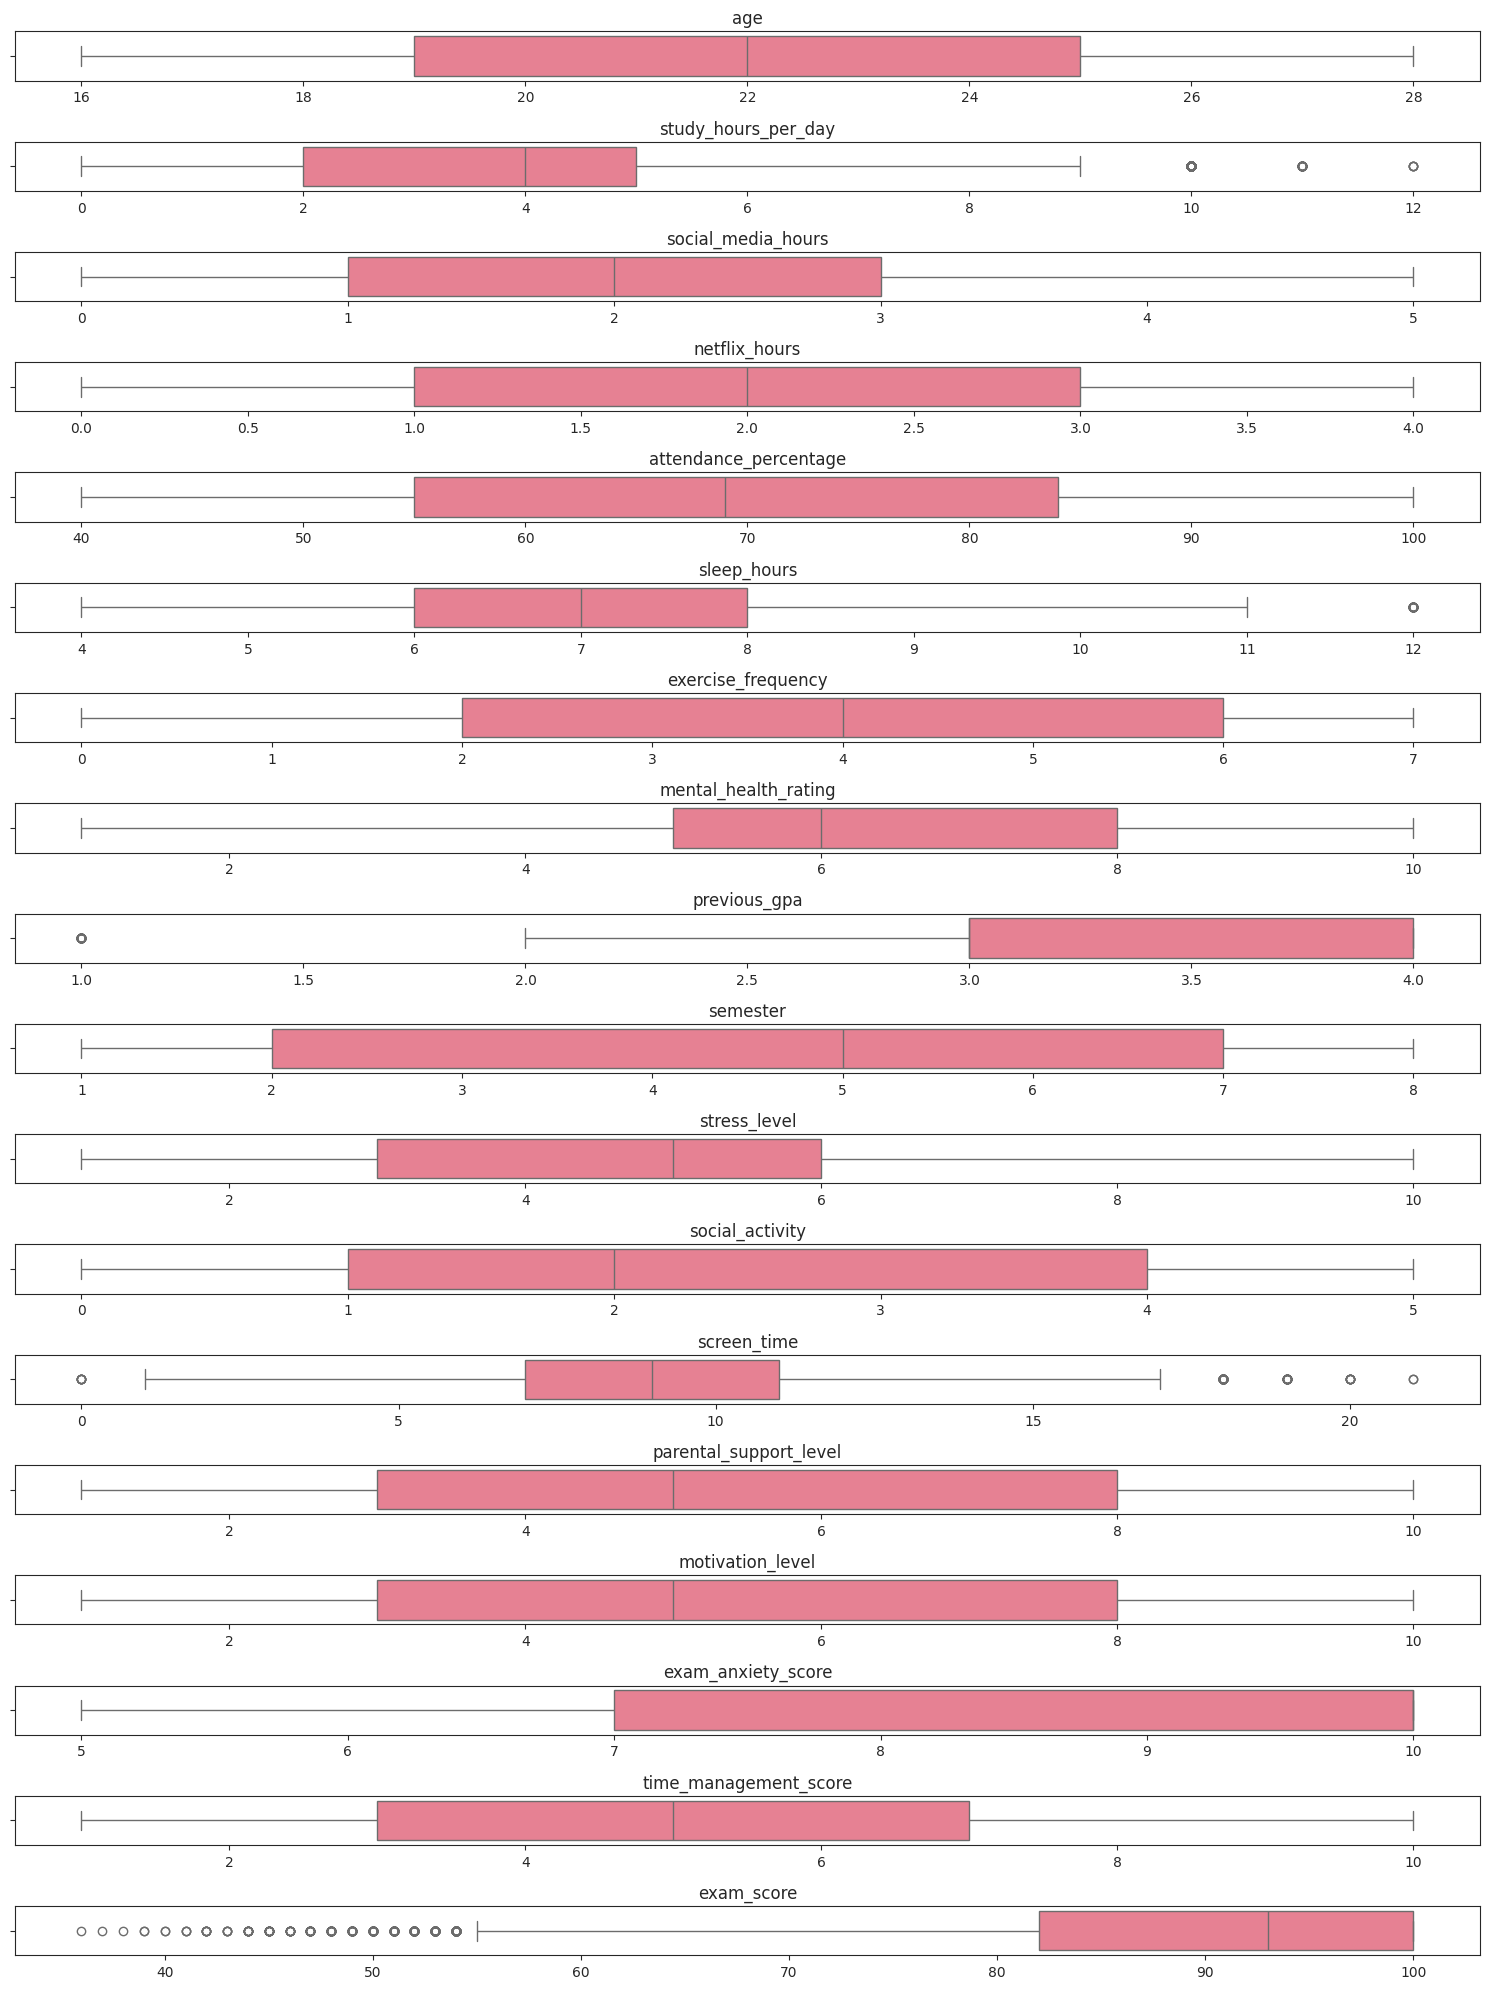

In [68]:
#Vẽ biều đồ Boxplot tìm giá trị ngoại lai
col_names = list(df.select_dtypes(include=int).columns)
fig, axes = plt.subplots(len(col_names), 1, figsize=(15, 20))

for row, column in enumerate(col_names):
    sns.boxplot(x=df[column].values, ax = axes[row])
    axes[row].set_title(column)

plt.tight_layout()
plt.show()

`Ta thấy có 5 thuộc tính là study_hour_per_date, sleep_hour, screen_time, exam_score, previous_gpa có giá trị ngoại lai.`

Bản ghi trước khi loại bỏ ngoại lai:  (80000, 27)
Bản ghi sau khi loại bỏ ngoại lai:  (79237, 27)


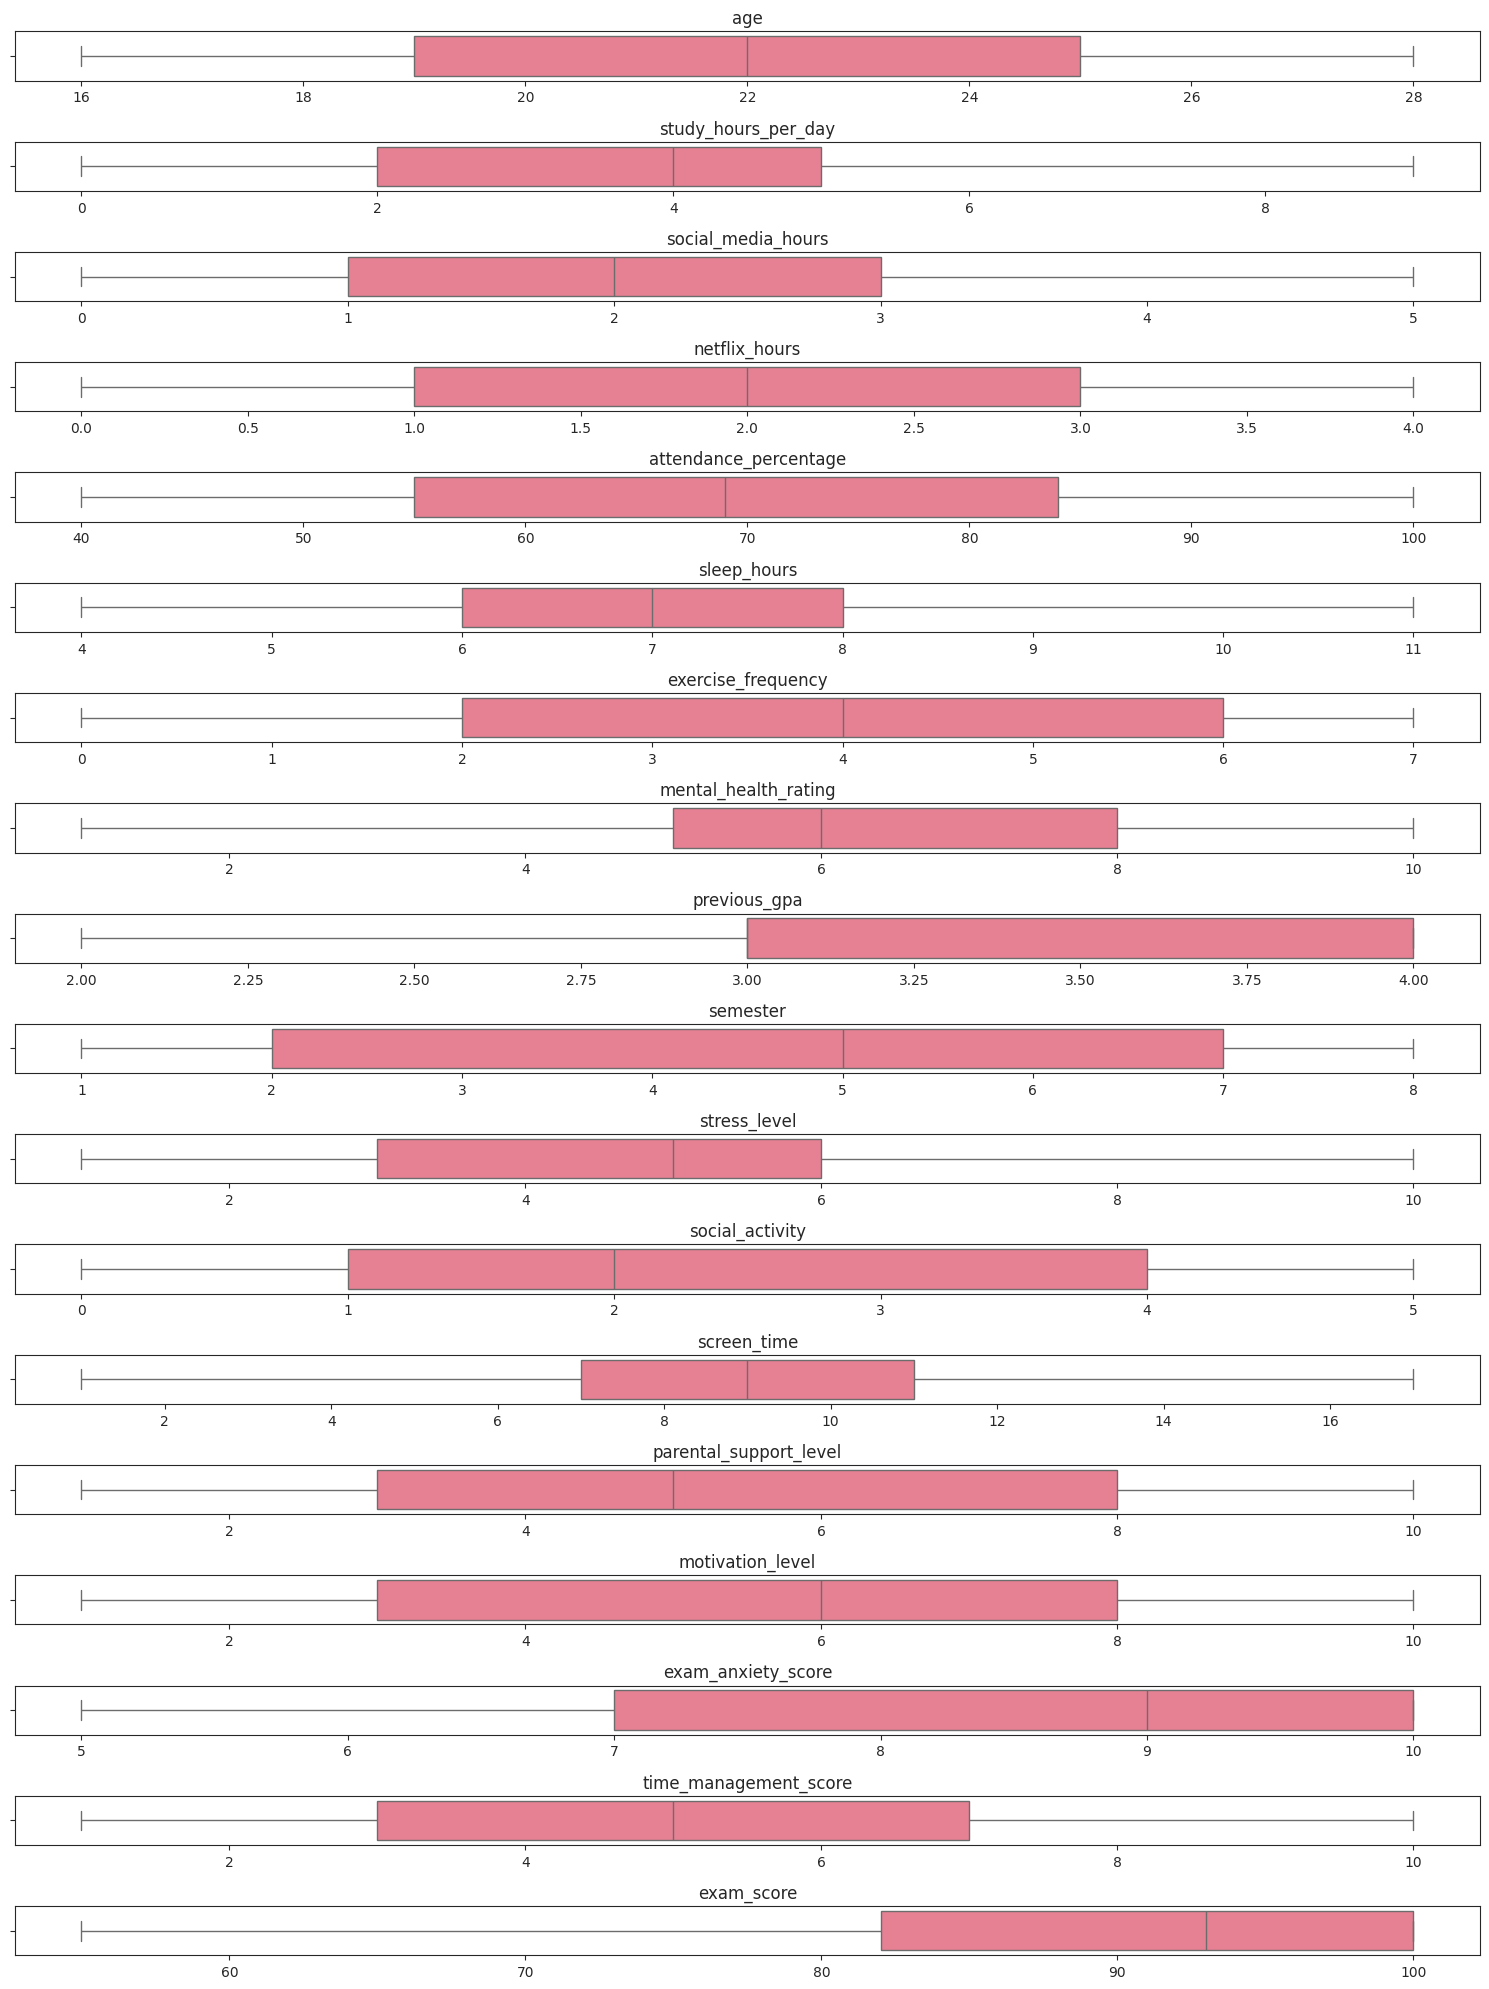

In [69]:
#Xử lý giá trị ngoại lai
outlier_cols =  ['study_hours_per_day', 'sleep_hours', 'previous_gpa', 'screen_time', 'exam_score']

print("Bản ghi trước khi loại bỏ ngoại lai: ", df.shape)

for i in outlier_cols:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    index_list = df[(df[i] < lower_bound) | (df[i] > upper_bound)].index
    df.drop(index_list, inplace=True)

print("Bản ghi sau khi loại bỏ ngoại lai: ", df.shape)

#Vẽ biểu đồ
fig, axes = plt.subplots(len(col_names), 1, figsize=(15, 20))
for row, column in enumerate(col_names):
    sns.boxplot(x=df[column].values, ax = axes[row])
    axes[row].set_title(column)

plt.tight_layout()
plt.show()

## 4.2 Chuyển đổi và Kỹ thuật Đặc trưng (Conversion and Feature Engineering)


In [70]:
# Diving features and target variable
x = df.drop(['dropout_risk'],axis=1).values
y = df['dropout_risk'].values

print('Features:', x.shape)
print('Target:', y.shape)

Features: (79237, 26)
Target: (79237,)


In [71]:
# TẠO CÁC ĐẶC TRƯNG MỚI CÓ NHIỀU THÔNG TIN HƠN TỪ CÁC ĐẶC TRƯNG HIỆN CÓ
print("\nFeature Engineering...")
# Tổng thời gian sử dụng thiết bị
df['screen_time_total'] = (
    df['social_media_hours'] +
    df['netflix_hours'] +
    df.get('screen_time', 0)
)
print("\nDataFrame với đặc trưng 'screen_time_total' mới:\n", df[['social_media_hours', 'netflix_hours', 'screen_time', 'screen_time_total']].head())

# Tỉ số giữa học và ngủ
df['study_sleep_ratio'] = (
    df['study_hours_per_day'] / df['sleep_hours']
)
print("\nDataFrame với đặc trưng 'study_sleep_ratio' mới:\n", df[['study_hours_per_day', 'sleep_hours', 'study_sleep_ratio']].head())

# Tổng căng thẳng lo âu
df['stress_anxiety_combined'] = (
    df['stress_level'] + df['exam_anxiety_score']
)
print("\nDataFrame với đặc trưng 'stress_anxiety_combined' mới:\n", df[['stress_level', 'exam_anxiety_score', 'stress_anxiety_combined']].head())

# Sự tác động tổng hợp giữa hỗ trợ phụ huynh và động lực
df['support_motivation_interaction'] = (
    df['parental_support_level'] * df['motivation_level']
)
print("\nDataFrame với đặc trưng 'support_motivation_interaction' mới:\n", df[['parental_support_level', 'motivation_level', 'support_motivation_interaction']].head())




Feature Engineering...

DataFrame với đặc trưng 'screen_time_total' mới:
    social_media_hours  netflix_hours  screen_time  screen_time_total
0                   3              0           10                 13
1                   0              0            8                  8
2                   4              0            8                 12
3                   4              2           11                 17
4                   0              2            9                 11

DataFrame với đặc trưng 'study_sleep_ratio' mới:
    study_hours_per_day  sleep_hours  study_sleep_ratio
0                    7            6           1.166667
1                    5            7           0.714286
2                    2            9           0.222222
3                    3            4           0.750000
4                    4            6           0.666667

DataFrame với đặc trưng 'stress_anxiety_combined' mới:
    stress_level  exam_anxiety_score  stress_anxiety_combined
0           

## 4.3 Chuẩn hóa (Normalization)

In [72]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

#Kiểm tra các thuộc tính danh mục và thuộc tính số
feature_columns = [col for col in df.columns if col not in ['student_id', 'exam_score']]
categorical_features = df[feature_columns].select_dtypes(include=['object']).columns.tolist()
numerical_features = df[feature_columns].select_dtypes(include=[np.number]).columns.tolist()

print(f"Categorical features: {categorical_features}")
print(f"Numerical features: {len(numerical_features)} features")

Categorical features: ['major', 'part_time_job', 'diet_quality', 'parental_education_level', 'extracurricular_participation', 'dropout_risk', 'study_environment', 'access_to_tutoring', 'family_income_range']
Numerical features: 21 features


In [73]:
# Sử dụng scikit-learn OneHotEncoder (phù hợp cho pipeline)
from sklearn.preprocessing import OneHotEncoder
data_to_encode = df[categorical_features]
# Khởi tạo OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
# Fit và Chuyển đổi dữ liệu
encoded_data = encoder.fit_transform(data_to_encode)
# Tạo dataframe từ kết quả mã hóa
encoded_df_sklearn = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features))
# Nối lại với DataFrame gốc (loại bỏ cột gốc đã mã hóa)
df = pd.concat([df.drop(columns=categorical_features), encoded_df_sklearn], axis=1)
print("\nDataFrame sau khi One-Hot Encoding bằng sklearn.OneHotEncoder():\n", df.head())



DataFrame sau khi One-Hot Encoding bằng sklearn.OneHotEncoder():
     age  study_hours_per_day  social_media_hours  netflix_hours  \
0  26.0                  7.0                 3.0            0.0   
1  28.0                  5.0                 0.0            0.0   
2  17.0                  2.0                 4.0            0.0   
3  27.0                  3.0                 4.0            2.0   
4  25.0                  4.0                 0.0            2.0   

   attendance_percentage  sleep_hours  exercise_frequency  \
0                   70.0          6.0                 3.0   
1                   88.0          7.0                 4.0   
2                   82.0          9.0                 4.0   
3                   79.0          4.0                 3.0   
4                   62.0          6.0                 6.0   

   mental_health_rating  previous_gpa  semester  ...  study_environment_Cafe  \
0                   6.0           4.0       5.0  ...                     0.0   
1  



```
# Chúng tôi đã chuyển đổi các biến phân loại bằng cách sử dụng Mã hóa One-Hot. Điều này tạo ra một cột riêng cho mỗi danh mục, cho phép mô hình xử lý các danh mục mà không cần giả định bất kỳ thứ tự nào giữa chúng.
```



## 4.4 Biến đổi (Transformation)

In [74]:
#Biến đổi thuộc tính số theo StandarScaler
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
print("\nDataFrame sau khi Chuẩn hóa bằng StandardScaler():\n", df[numerical_features].head())


DataFrame sau khi Chuẩn hóa bằng StandardScaler():
         age  study_hours_per_day  social_media_hours  netflix_hours  \
0  1.067144             1.665672            0.662587      -1.358396   
1  1.601063             0.650248           -1.431104      -1.358396   
2 -1.335491            -0.872890            1.360484      -1.358396   
3  1.334103            -0.365177            1.360484       0.396765   
4  0.800184             0.142535           -1.431104       0.396765   

   attendance_percentage  sleep_hours  exercise_frequency  \
0               0.027939    -0.395468           -0.227925   
1               1.066269     0.286025            0.208520   
2               0.720159     1.649010            0.208520   
3               0.547104    -1.758454           -0.227925   
4              -0.433541    -0.395468            1.081408   

   mental_health_rating  previous_gpa  semester  ...  social_activity  \
0             -0.190614      1.077313  0.219201  ...        -1.467415   
1      



```
# Chúng tôi đã chuẩn hóa các biến số bằng StandardScaler, công cụ này chuyển đổi các đặc điểm này thành giá trị trung bình bằng 0 và độ lệch chuẩn bằng 1. Điều này giúp các mô hình học tốt hơn.

```



In [75]:
df.head()

age  study_hours_per_day  social_media_hours  netflix_hours  \
0  1.067144             1.665672            0.662587      -1.358396   
1  1.601063             0.650248           -1.431104      -1.358396   
2 -1.335491            -0.872890            1.360484      -1.358396   
3  1.334103            -0.365177            1.360484       0.396765   
4  0.800184             0.142535           -1.431104       0.396765   

   attendance_percentage  sleep_hours  exercise_frequency  \
0               0.027939    -0.395468           -0.227925   
1               1.066269     0.286025            0.208520   
2               0.720159     1.649010            0.208520   
3               0.547104    -1.758454           -0.227925   
4              -0.433541    -0.395468            1.081408   

   mental_health_rating  previous_gpa  semester  ...  study_environment_Cafe  \
0             -0.190614      1.077313  0.219201  ...                     0.0   
1             -0.190614      1.077313  1.090713  ...                     0.0   
2             -0.695788     -0.398944 -0.216556  ...                     0.0   
3              0.819734      1.077313  0.654957  ...                     0.0   
4              1.324908      1.077313 -0.216556  ...                     0.0   

   study_environment_Co-Learning Group  study_environment_Dorm  \
0                                  1.0                     0.0   
1                                  1.0                     0.0   
2                                  0.0                     0.0   
3                                  1.0                     0.0   
4                                  0.0                     0.0   

   study_environment_Library  study_environment_Quiet Room  \
0                        0.0                           0.0   
1                        0.0                           0.0   
2                        1.0                           0.0   
3                        0.0                           0.0   
4                        0.0                           1.0   

   access_to_tutoring_No  access_to_tutoring_Yes  family_income_range_High  \
0                    0.0                     1.0                       1.0   
1                    0.0                     1.0                       0.0   
2                    0.0                     1.0                       1.0   
3                    0.0                     1.0                       0.0   
4                    0.0                     1.0                       0.0   

   family_income_range_Low  family_income_range_Medium  
0                      0.0                         0.0  
1                      1.0                         0.0  
2                      0.0                         0.0  
3                      1.0                         0.0  
4                      0.0                         1.0  

[5 rows x 52 columns]

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79993 entries, 0 to 79190
Data columns (total 52 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   age                                    79237 non-null  float64
 1   study_hours_per_day                    79237 non-null  float64
 2   social_media_hours                     79237 non-null  float64
 3   netflix_hours                          79237 non-null  float64
 4   attendance_percentage                  79237 non-null  float64
 5   sleep_hours                            79237 non-null  float64
 6   exercise_frequency                     79237 non-null  float64
 7   mental_health_rating                   79237 non-null  float64
 8   previous_gpa                           79237 non-null  float64
 9   semester                               79237 non-null  float64
 10  stress_level                           79237 non-null  float64
 11  social_

## 4.5 Xử lý Đa cộng tuyến (Multicollinearity Handling)


### Tính ma trận tương quan, Tính hệ số VIF (Variance Inflation Factor), Xử lý nếu phát hiện đa cộng tuyến
VIF < 5: OK

5 ≤ VIF < 10: cần cân nhắc

VIF ≥ 10: cần xử lý



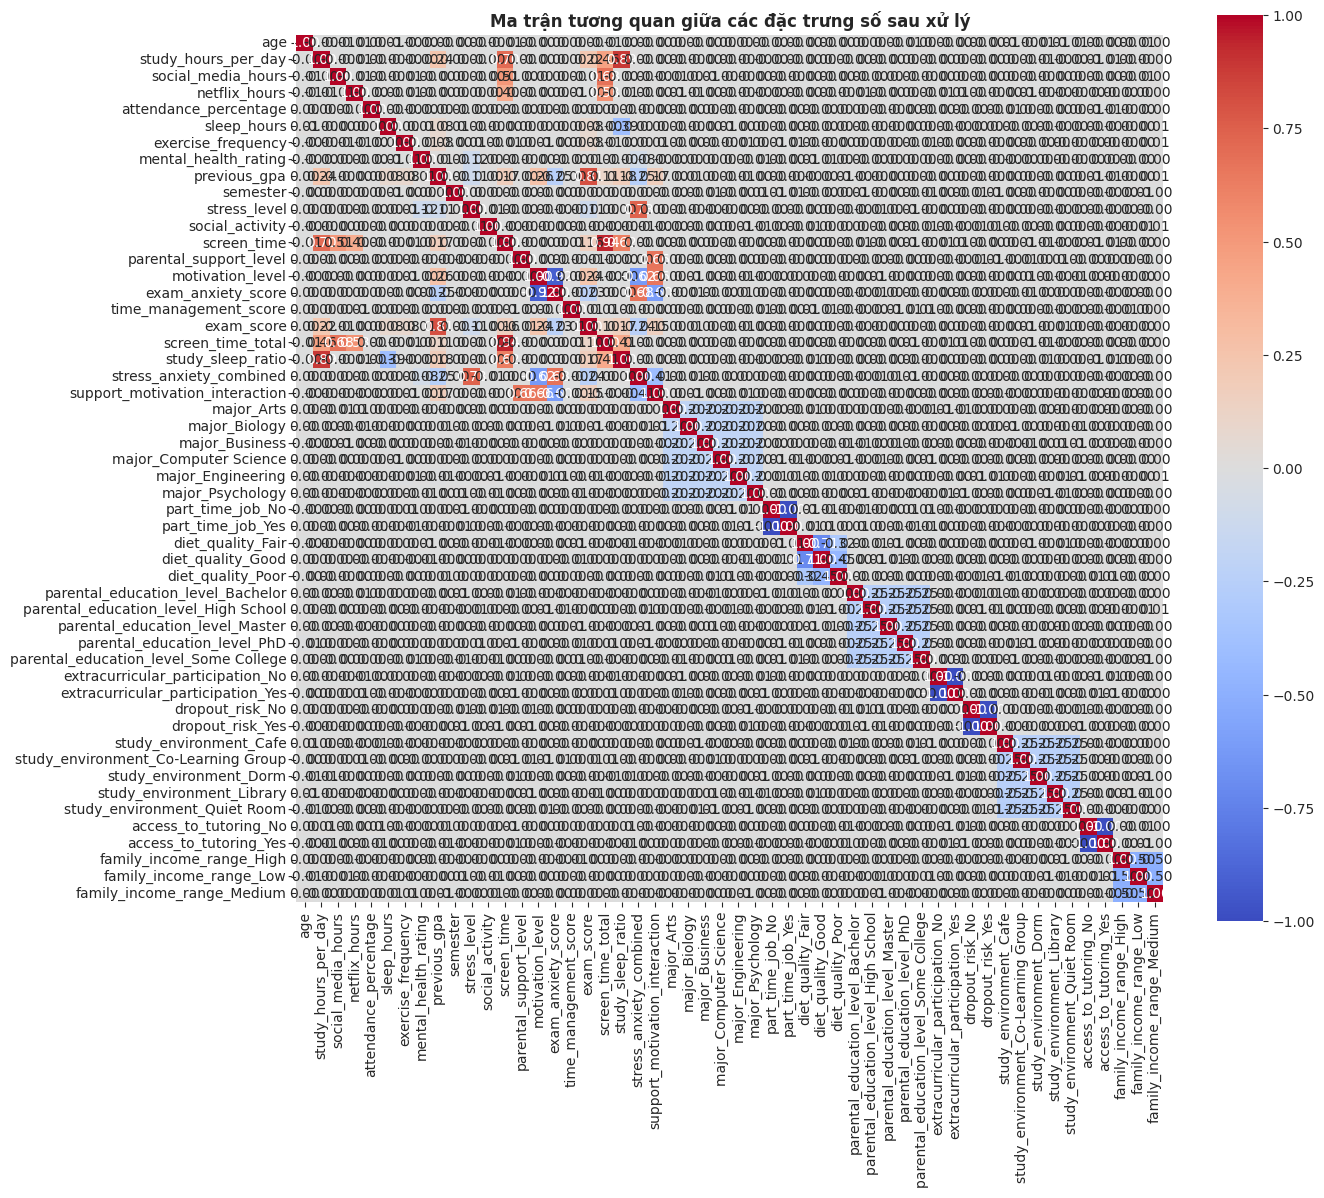

In [47]:
import matplotlib.pyplot as plt
import numpy as np
numerical_cols_after_processing = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(14, 12))
correlation_matrix_processed = df[numerical_cols_after_processing].corr()
sns.heatmap(correlation_matrix_processed, annot=True, cmap='coolwarm', center=0, fmt='.2f', square=True)
plt.title('Ma trận tương quan giữa các đặc trưng số sau xử lý', fontweight='bold')
plt.tight_layout()
plt.show()

In [48]:
# Cặp nào có hệ số tương quan > 0.8 hoặc < -0.8 gây ra cộng tuyến
# Tìm các cặp có hệ số tương quan > 0.8 hoặc < -0.8
high_corr_pairs = {}
for i in range(len(correlation_matrix_processed.columns)):
    for j in range(i + 1, len(correlation_matrix_processed.columns)):
        col1 = correlation_matrix_processed.columns[i]
        col2 = correlation_matrix_processed.columns[j]
        corr_value = correlation_matrix_processed.iloc[i, j]

        if abs(corr_value) > 0.8:
            high_corr_pairs[(col1, col2)] = corr_value

print("\nCác cặp đặc trưng có hệ số tương quan > 0.8 hoặc < -0.8 (gây ra cộng tuyến):")
if high_corr_pairs:
    for (col1, col2), corr_value in high_corr_pairs.items():
        print(f"  - Cặp ({col1}, {col2}): {corr_value:.2f}")
else:
    print("  - Không tìm thấy cặp đặc trưng nào có hệ số tương quan cao.")



Các cặp đặc trưng có hệ số tương quan > 0.8 hoặc < -0.8 (gây ra cộng tuyến):
  - Cặp (study_hours_per_day, study_sleep_ratio): 0.89
  - Cặp (previous_gpa, exam_score): 0.81
  - Cặp (screen_time, screen_time_total): 0.94
  - Cặp (motivation_level, exam_anxiety_score): -0.92
  - Cặp (part_time_job_No, part_time_job_Yes): -1.00
  - Cặp (extracurricular_participation_No, extracurricular_participation_Yes): -1.00
  - Cặp (dropout_risk_No, dropout_risk_Yes): -1.00
  - Cặp (access_to_tutoring_No, access_to_tutoring_Yes): -1.00


# 5.Xây dựng Mô hình (Model Building)

```
- Đối với mỗi mô hình/thuật toán được sử dụng (ví dụ: Decision Tree, k-Means, Apriori,...):

- Trình bày cơ sở lý thuyết ngắn gọn của thuật toán.

- Lý do lựa chọn thuật toán này cho bài toán của nhóm.

- Quá trình thực thi và các tham số được lựa chọn.

```




## 5.1 Phân loại/Dự đoán Kết quả Học tập (Classification/Prediction of Learning Outcomes)


Mean Squared Error: 43.77001621644613
R2 Score: 0.6531875558666296
Mean Absolute Error: 4.919741574897082


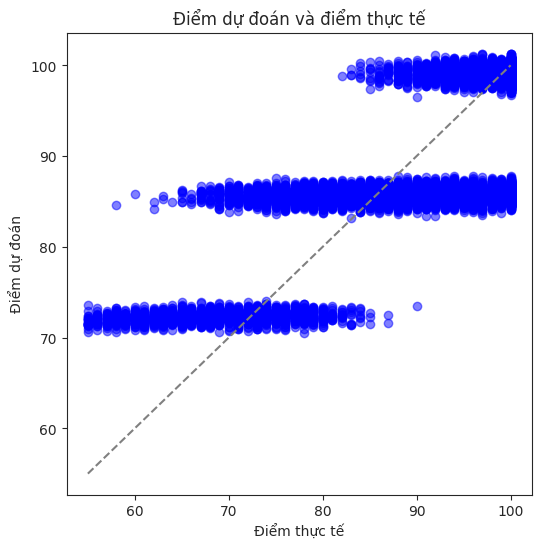

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from xgboost import XGBRegressor

#Phân loại
bins = [0, 60, 75, 90, 100]
labels = ['Yếu', 'Trung bình', 'Giỏi', 'Xuất Sắc']

# Select all categorical columns for encoding
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Apply one-hot encoding to all categorical columns
df = pd.get_dummies(df, columns=categorical_cols, dtype=int)

# Drop rows with any NaN values that might have been introduced
df.dropna(inplace=True)

#Tách dữ liệu
X = df.drop("exam_score", axis=1)
y = df["exam_score"]

#Chia train và test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#Hồi quy Tuyến tính (LinReg)
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)
print("Mean Absolute Error:", mae)
#Vẽ biểu đồ trực quan
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color="gray")
plt.xlabel("Điểm thực tế")
plt.ylabel("Điểm dự đoán")
plt.title("Điểm dự đoán và điểm thực tế")
plt.show() #Mô hình này có vẻ không ổn?

Mean Squared Error: 43.77001621644613
R2 Score: 0.6531875558666296
Mean Absolute Error: 4.919741574897082


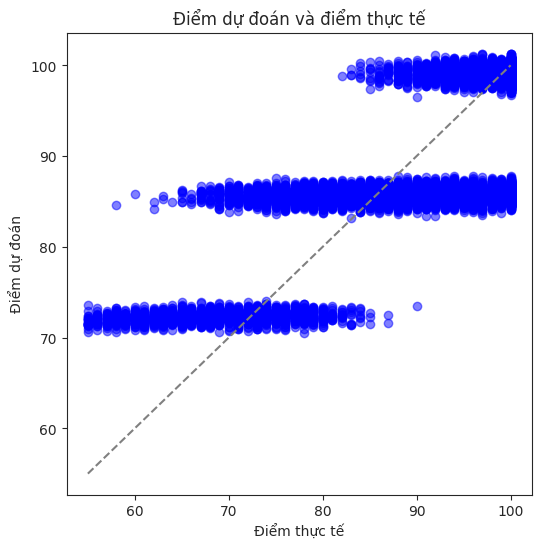

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from xgboost import XGBRegressor

#Phân loại
bins = [0, 60, 75, 90, 100]
labels = ['Yếu', 'Trung bình', 'Giỏi', 'Xuất Sắc']

# Select all categorical columns for encoding
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Apply one-hot encoding to all categorical columns
df = pd.get_dummies(df, columns=categorical_cols, dtype=int)


#Tách dữ liệu
X = df.drop("exam_score", axis=1)
y = df["exam_score"]

#Chia train và test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#Hồi quy Tuyến tính (LinReg)
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)
print("Mean Absolute Error:", mae)
#Vẽ biểu đồ trực quan
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color="gray")
plt.xlabel("Điểm thực tế")
plt.ylabel("Điểm dự đoán")
plt.title("Điểm dự đoán và điểm thực tế")
plt.show() #Mô hình này có vẻ không ổn?

In [80]:
#Cây Quyết định (DT)
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("\nDecision Tree Classifier:")
print(classification_report(y_test, y_pred_dt))
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.2f}") #Dự đoán 27% thì có ổn không?


Decision Tree Classifier:
              precision    recall  f1-score   support

        55.0       0.00      0.00      0.00        24
        56.0       0.00      0.00      0.00        35
        57.0       0.00      0.00      0.00        26
        58.0       0.00      0.00      0.00        38
        59.0       0.00      0.00      0.00        51
        60.0       0.00      0.00      0.00        61
        61.0       0.00      0.00      0.00        66
        62.0       0.00      0.00      0.00        67
        63.0       0.00      0.00      0.00        87
        64.0       0.00      0.00      0.00        84
        65.0       0.07      0.27      0.11       118
        66.0       0.05      0.14      0.07        91
        67.0       0.04      0.09      0.06       119
        68.0       0.04      0.05      0.04       144
        69.0       0.07      0.21      0.10       153
        70.0       0.03      0.06      0.04       141
        71.0       0.05      0.02      0.03       175


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [81]:
#Rừng ngẫu nhiên (Random Forest - RF)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}") #Dự đoán có 26% thì có ổn không?

Random Forest Classifier:
              precision    recall  f1-score   support

        55.0       0.00      0.00      0.00        24
        56.0       0.00      0.00      0.00        35
        57.0       0.00      0.00      0.00        26
        58.0       0.08      0.03      0.04        38
        59.0       0.00      0.00      0.00        51
        60.0       0.10      0.03      0.05        61
        61.0       0.05      0.03      0.04        66
        62.0       0.10      0.06      0.07        67
        63.0       0.08      0.06      0.07        87
        64.0       0.04      0.02      0.03        84
        65.0       0.06      0.05      0.05       118
        66.0       0.04      0.05      0.04        91
        67.0       0.03      0.05      0.04       119
        68.0       0.07      0.07      0.07       144
        69.0       0.08      0.08      0.08       153
        70.0       0.04      0.06      0.05       141
        71.0       0.05      0.05      0.05       175
 


Random Forest Regressor:
Mean Squared Error: 40.48
R2 Score: 0.68
Mean Absolute Error: 4.87


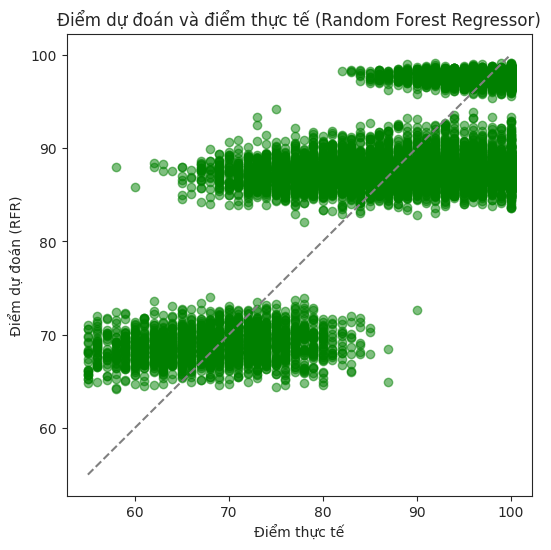


XGBoost Regressor:
Mean Squared Error: 39.89
R2 Score: 0.68
Mean Absolute Error: 4.81


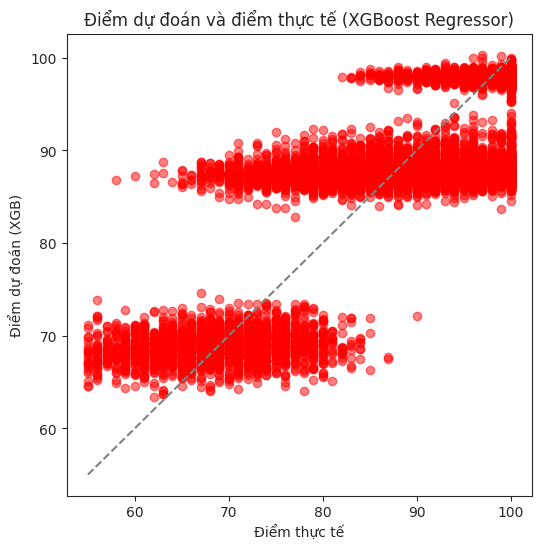

In [91]:
import matplotlib.pyplot as plt
# Rừng ngẫu nhiên cho hồi quy (Random Forest Regressor)
rfr = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)

print("\nRandom Forest Regressor:")
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
r2_rfr = r2_score(y_test, y_pred_rfr)
mae_rfr = mean_absolute_error(y_test, y_pred_rfr)

print(f"Mean Squared Error: {mse_rfr:.2f}")
print(f"R2 Score: {r2_rfr:.2f}")
print(f"Mean Absolute Error: {mae_rfr:.2f}")

# Trực quan hóa kết quả Random Forest Regressor
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rfr, alpha=0.5, color="green")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color="gray")
plt.xlabel("Điểm thực tế")
plt.ylabel("Điểm dự đoán (RFR)")
plt.title("Điểm dự đoán và điểm thực tế (Random Forest Regressor)")
plt.show()

# XGBoost Regressor
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("\nXGBoost Regressor:")
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

print(f"Mean Squared Error: {mse_xgb:.2f}")
print(f"R2 Score: {r2_xgb:.2f}")
print(f"Mean Absolute Error: {mae_xgb:.2f}")

# Trực quan hóa kết quả XGBoost Regressor
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_xgb, alpha=0.5, color="red")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color="gray")
plt.xlabel("Điểm thực tế")
plt.ylabel("Điểm dự đoán (XGB)")
plt.title("Điểm dự đoán và điểm thực tế (XGBoost Regressor)")
plt.show()

## 5.2 Phân cụm Sinh viên (Student Clustering)


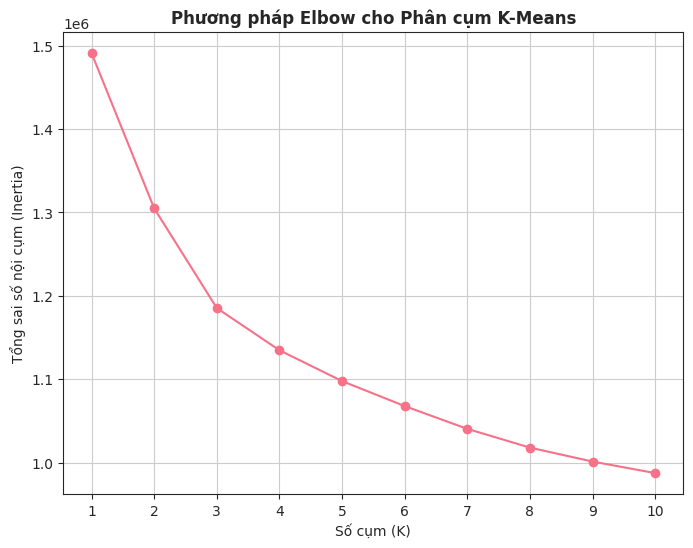

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Chọn các đặc trưng phù hợp cho phân cụm (chỉ lấy các cột số sau tiền xử lý)
# Loại bỏ cột mục tiêu 'exam_score' nếu vẫn còn trong df và cột 'dropout_risk'
# và các cột One-Hot Encoding của 'major', 'part_time_job', 'study_environment' để tập trung vào hành vi và tâm lý
clustering_features = [
    'age', 'study_hours_per_day', 'social_media_hours',
    'netflix_hours', 'screen_time', 'attendance_percentage',
    'sleep_hours', 'exercise_frequency', 'diet_quality',
    'mental_health_rating', 'stress_level', 'exam_anxiety_score',
    'extracurricular_participation', 'access_to_tutoring',
    'family_income_range', 'parental_support_level',
    'parental_education_level', 'motivation_level',
    'time_management_score', 'previous_gpa',
    'screen_time_total', 'study_sleep_ratio',
    'stress_anxiety_combined', 'support_motivation_interaction'
]

clustering_features = [col for col in clustering_features if col in df.columns]

X_cluster = df[clustering_features]

inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster)
    inertia.append(kmeans.inertia_)

# Vẽ biểu đồ Elbow
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, marker='o')
plt.xlabel('Số cụm (K)')
plt.ylabel('Tổng sai số nội cụm (Inertia)')
plt.title('Phương pháp Elbow cho Phân cụm K-Means', fontweight='bold')
plt.xticks(K)
plt.grid(True)
plt.show()



```
# Inertia là tổng bình phương khoảng cách từ mỗi điểm dữ liệu đến tâm cụm gần nhất của nó.
```




In [99]:
# Chọn số cụm dựa trên biểu đồ Elbow (ví dụ: K=3 hoặc K=4)
# Giả sử chọn K=3 dựa vào điểm khuỷu tay
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10) # Thêm n_init để tránh cảnh báo
clusters = kmeans.fit_predict(X_cluster)

# Thêm cột 'Cluster' vào DataFrame gốc (sử dụng index của df sau khi drop outlier)
df['Cluster'] = clusters

# Hiển thị kết quả phân cụm (ví dụ: đếm số lượng sinh viên trong mỗi cụm)
print(f"\nSố lượng sinh viên trong mỗi cụm (K={optimal_k}):")
print(df['Cluster'].value_counts().sort_index())

# Phân tích đặc điểm của các cụm (ví dụ: tính giá trị trung bình của các đặc trưng trong mỗi cụm)
print("\nĐặc điểm trung bình của các cụm:")
print(df.groupby('Cluster')[clustering_features].mean())


Số lượng sinh viên trong mỗi cụm (K=3):
Cluster
0    26140
1    27865
2    24476
Name: count, dtype: int64

Đặc điểm trung bình của các cụm:
              age  study_hours_per_day  social_media_hours  netflix_hours  \
Cluster                                                                     
0       -0.010437             0.700786            0.431512       0.333749   
1        0.007861            -0.632380           -0.394039      -0.301709   
2        0.002698            -0.029323           -0.010760      -0.014238   

         screen_time  attendance_percentage  sleep_hours  exercise_frequency  \
Cluster                                                                        
0           0.885062               0.011101    -0.112990           -0.006881   
1          -0.802358              -0.010040     0.079877           -0.009005   
2          -0.031986              -0.001510     0.030089            0.016510   

         mental_health_rating  stress_level  exam_anxiety_score  \
Clus

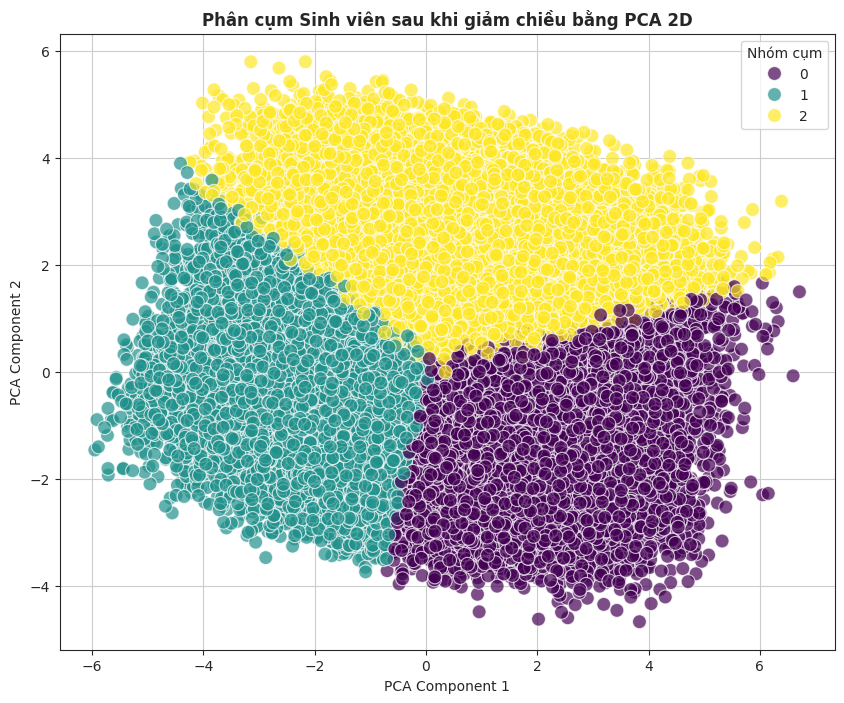

In [102]:
# Trực quan hóa kết quả phân cụm (ví dụ: sử dụng PCA để giảm chiều và vẽ biểu đồ phân tán)
from sklearn.decomposition import PCA

# Giảm chiều dữ liệu xuống 2D cho mục đích trực quan hóa
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster)

# Tạo DataFrame từ kết quả PCA và thêm cột Cluster
pca_df = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = clusters

# Vẽ biểu đồ phân tán
plt.figure(figsize=(10, 8))
sns.scatterplot(
  x='PCA1',
  y='PCA2',
  hue='Cluster',
  data=pca_df,
  palette='viridis',
  s=100,
  alpha=0.7
)
plt.title('Phân cụm Sinh viên sau khi giảm chiều bằng PCA 2D', fontweight='bold')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Nhóm cụm')
plt.grid(True)
plt.show()

In [108]:
# Gắn nhãn cụm vào DataFrame gốc
df_clustered = df.copy()
df_clustered['Cluster'] = clusters

cluster_summary = df_clustered.groupby('Cluster')[clustering_features].median()


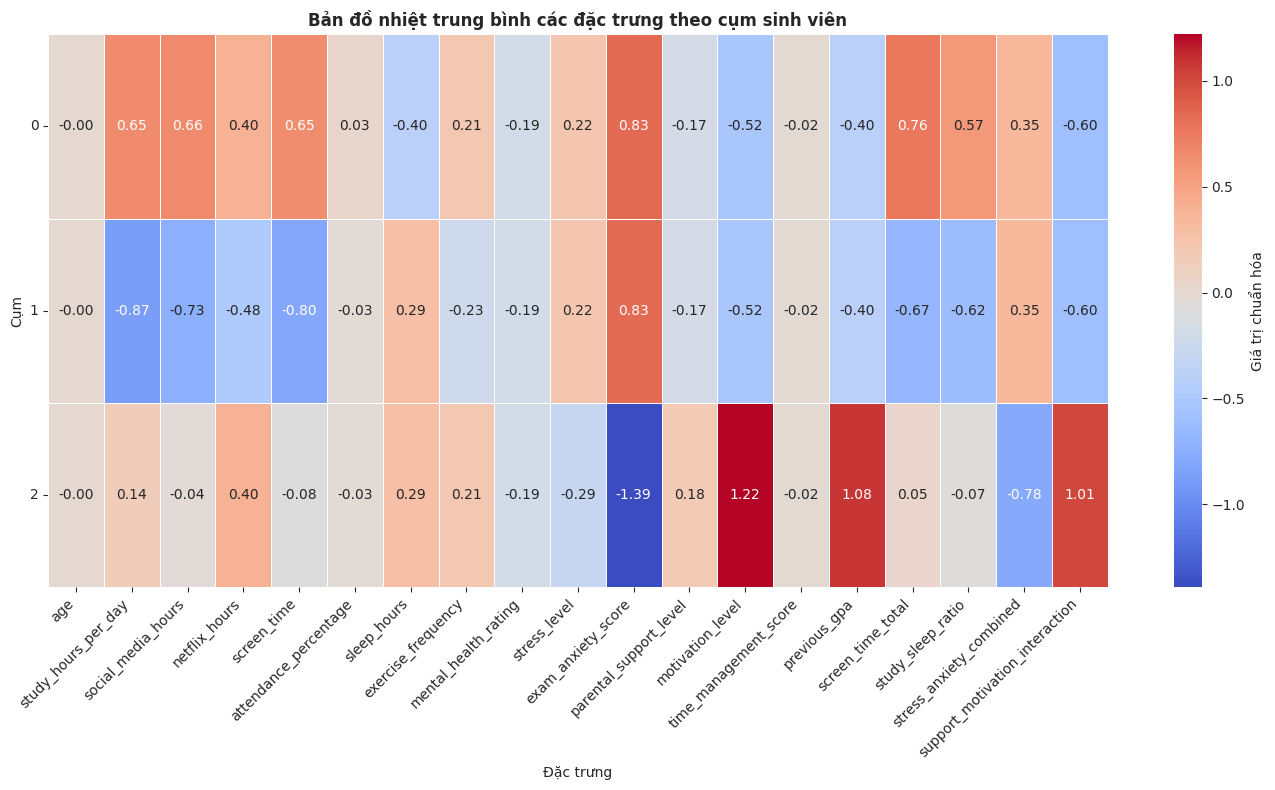

In [109]:
plt.figure(figsize=(14, 8))
sns.heatmap(cluster_summary, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar_kws={'label': 'Giá trị chuẩn hóa'})
plt.title('Bản đồ nhiệt trung bình các đặc trưng theo cụm sinh viên', fontweight='bold')
plt.xlabel('Đặc trưng')
plt.ylabel('Cụm')
plt.yticks(rotation=0)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [113]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1.0, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(df)


In [114]:
labels = df['DBSCAN_Cluster']
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = (labels == -1).sum()

print(f"Số cụm được phát hiện: {n_clusters}")
print(f"Số điểm nhiễu (outlier): {n_noise}")


Số cụm được phát hiện: 1
Số điểm nhiễu (outlier): 78481


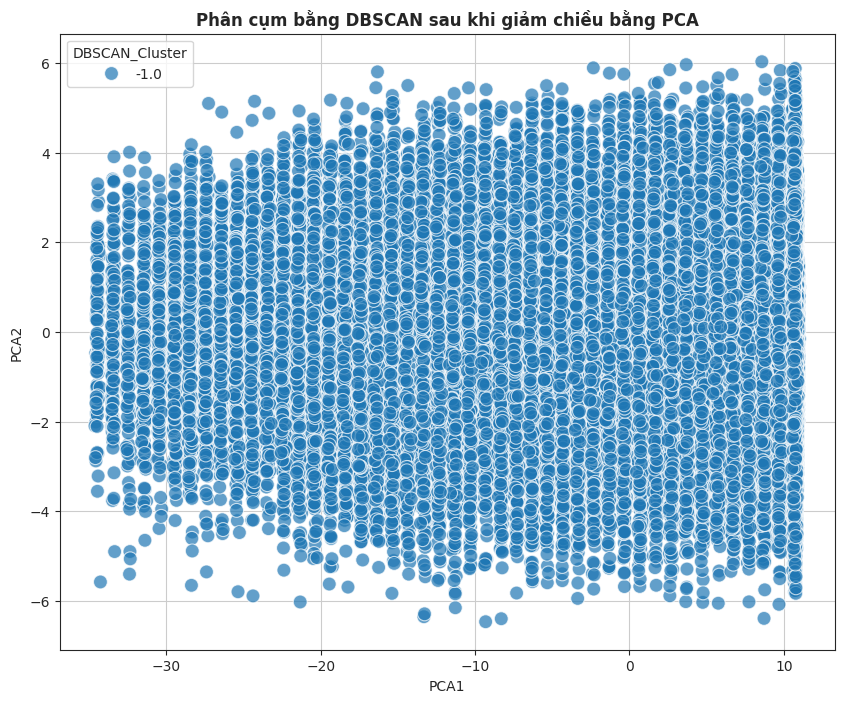

In [115]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df.drop('DBSCAN_Cluster', axis=1))  # bỏ cột DBSCAN_Cluster

pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['DBSCAN_Cluster'] = df['DBSCAN_Cluster']

plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=pca_df,
    x='PCA1', y='PCA2',
    hue='DBSCAN_Cluster',
    palette='tab10',
    s=100, alpha=0.7
)
plt.title('Phân cụm bằng DBSCAN sau khi giảm chiều bằng PCA', fontweight='bold')
plt.grid(True)
plt.show()


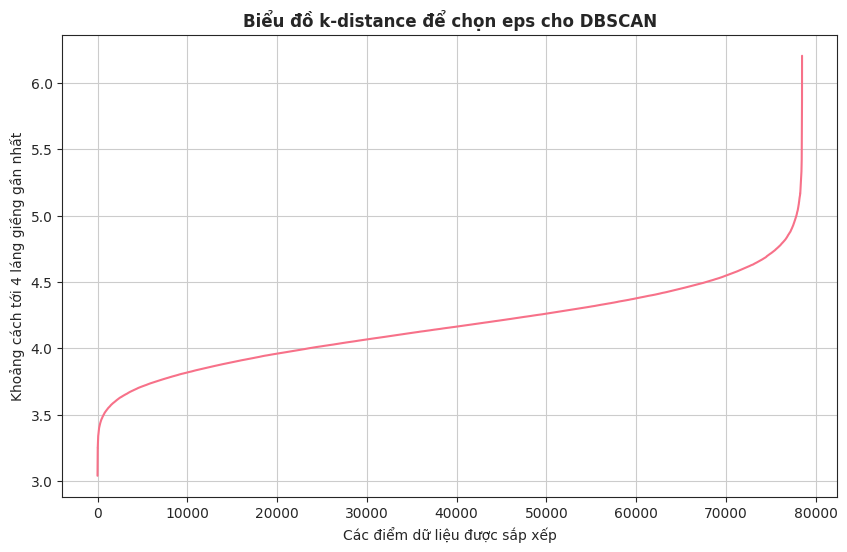

In [116]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Thiết lập số hàng xóm gần nhất (k = min_samples - 1)
k = 4  # nếu bạn dùng min_samples = 5
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(df)

# Tính khoảng cách đến k láng giềng gần nhất
distances, indices = neighbors_fit.kneighbors(df)

# Lấy khoảng cách xa nhất trong số k láng giềng → dùng cột cuối
k_distances = np.sort(distances[:, k - 1])

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(k_distances)
plt.ylabel(f'Khoảng cách tới {k} láng giềng gần nhất')
plt.xlabel('Các điểm dữ liệu được sắp xếp')
plt.title('Biểu đồ k-distance để chọn eps cho DBSCAN', fontweight='bold')
plt.grid(True)
plt.show()


In [118]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=4.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(df)


In [119]:
print(df['DBSCAN_Cluster'].value_counts())
print("Số cụm:", len(set(df['DBSCAN_Cluster'])) - (1 if -1 in df['DBSCAN_Cluster'] else 0))
print("Số điểm nhiễu:", (df['DBSCAN_Cluster'] == -1).sum())


DBSCAN_Cluster
 0    74385
-1     4078
 5        4
 2        3
 3        3
 4        3
 6        3
 1        2
Name: count, dtype: int64
Số cụm: 8
Số điểm nhiễu: 4078


/tmp/ipython-input-123-2865302115.py:21: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


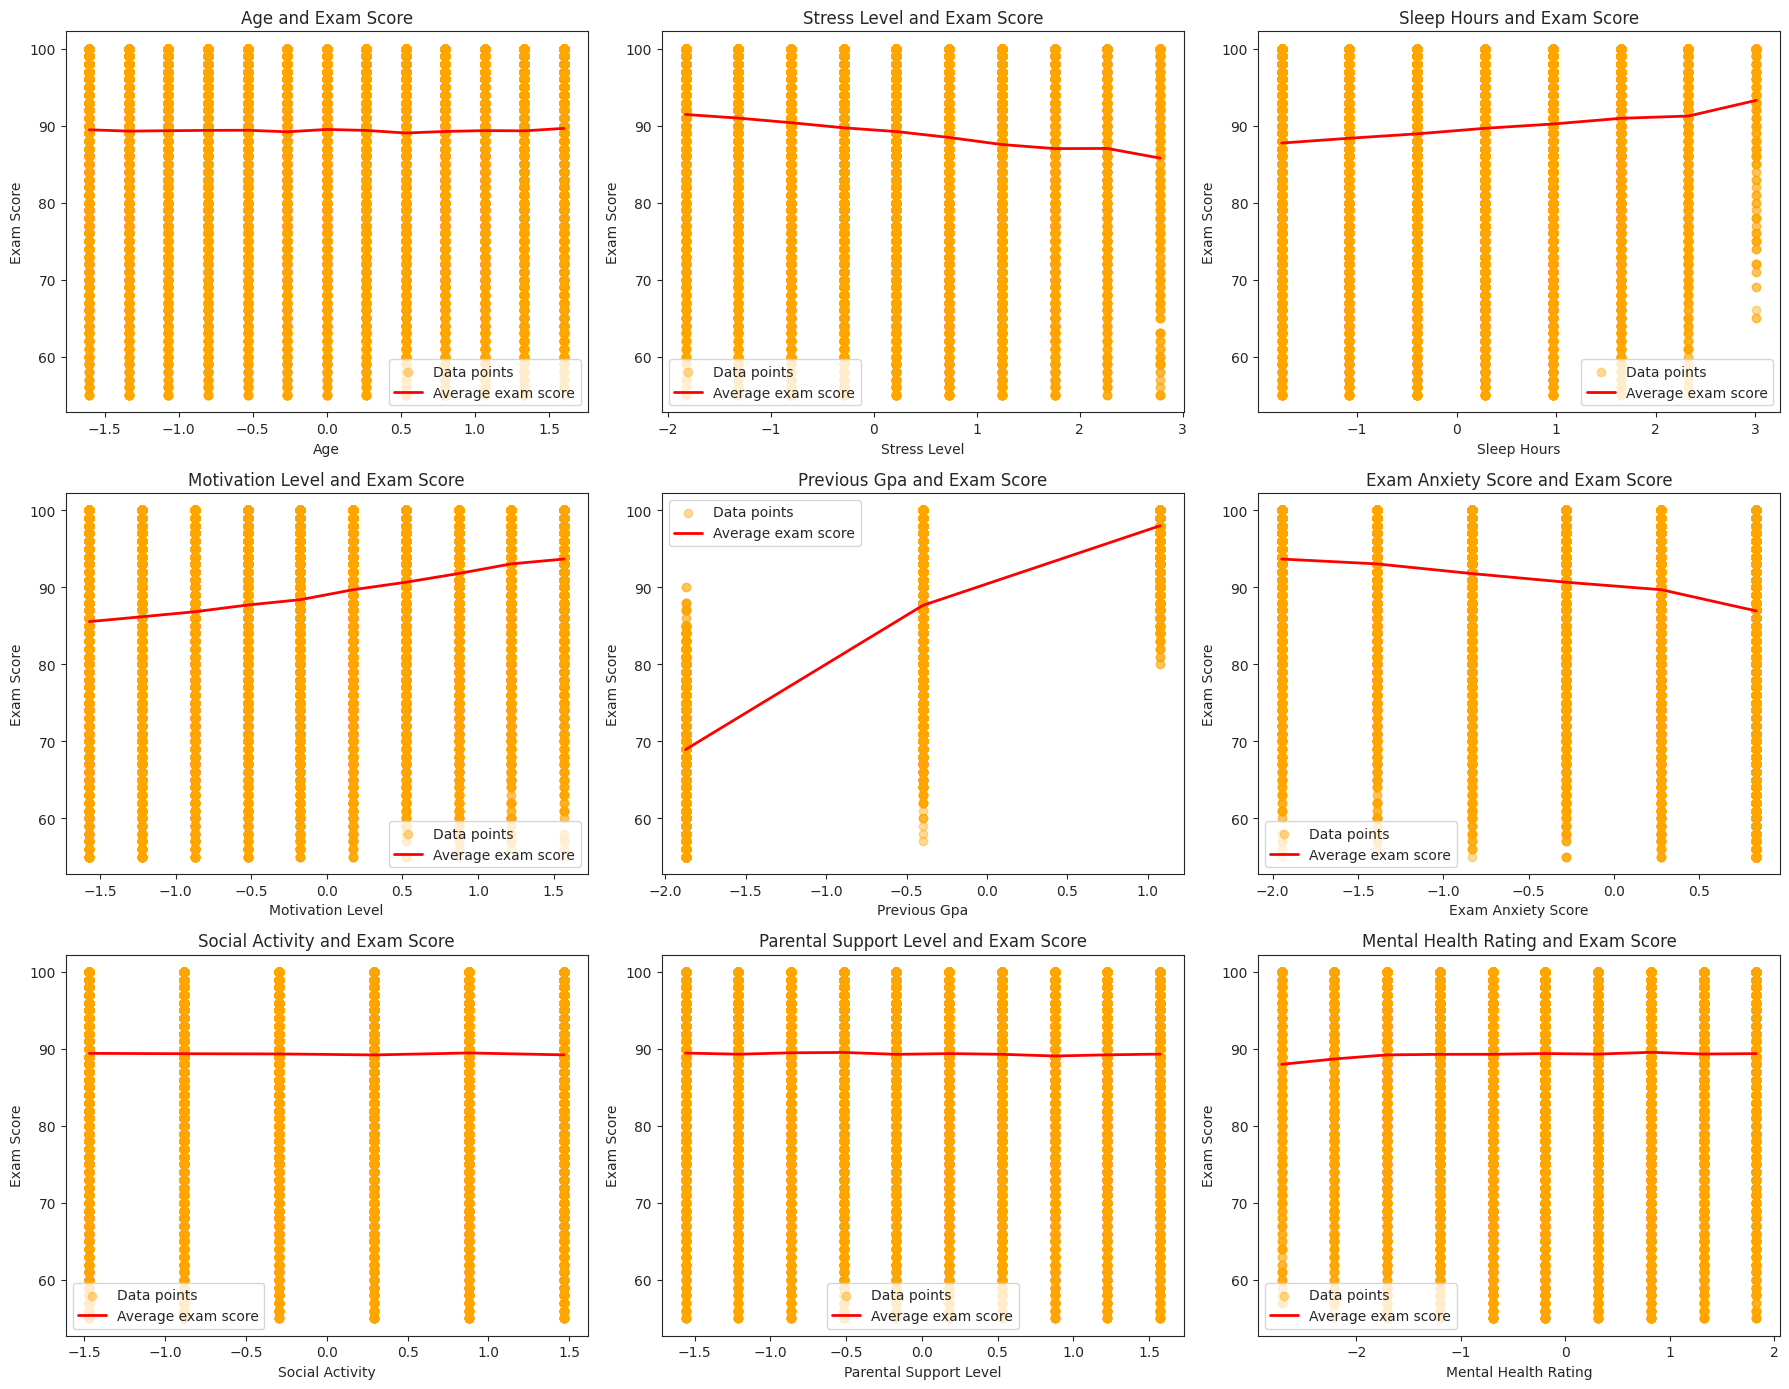

In [123]:
scatter_cols = ["age", "stress_level", "sleep_hours", "motivation_level", "previous_gpa", "exam_anxiety_score","social_activity","parental_support_level","mental_health_rating"]

fig, axs = plt.subplots(3, 3, figsize=(18, 14))
axs = axs.flatten()

for idx, col in enumerate(scatter_cols):
    ax = axs[idx]


    ax.scatter(df[col], df["exam_score"], color="orange", alpha=0.4, label="Data points")


    mean = df.groupby(col)["exam_score"].mean()
    ax.plot(mean.index, mean.values, color="red", linewidth=2, label="Average exam score")

    ax.set_xlabel(col.replace('_', ' ').title())
    ax.set_ylabel("Exam Score")
    ax.set_title(f"{col.replace('_', ' ').title()} and Exam Score")
    ax.legend()

plt.tight_layout()
plt.show()

## 5.3 Phân tích Tương quan và Khám phá Mẫu hình (Correlation Analysis and Pattern Discovery)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Giả định df_processed là DataFrame đã được tiền xử lý
df_processed = df_encoded_sklearn

# Chọn các cột số để tính tương quan (bao gồm cả biến mục tiêu nếu muốn)
correlation_cols = ['study_hours_per_day', 'social_media_hours', 'sleep_hours',
                    'mental_health_rating', 'motivation_level', 'previous_gpa', 'exam_score']

# Tính ma trận tương quan Pearson
corr_matrix_pearson = df_processed[correlation_cols].corr(method='pearson')
print("\nMa trận tương quan Pearson:\n", corr_matrix_pearson)

# Trực quan hóa ma trận tương quan bằng heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_pearson, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Ma trận tương quan Pearson giữa các đặc trưng')
plt.show()

# Tính ma trận tương quan Spearman (cho mối quan hệ đơn điệu)
corr_matrix_spearman = df_processed[correlation_cols].corr(method='spearman')
print("\nMa trận tương quan Spearman:\n", corr_matrix_spearman)


NameError: name 'df_encoded_sklearn' is not defined

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd

# Để áp dụng Apriori, dữ liệu cần ở định dạng giao dịch (binary, True/False)
# Ví dụ: Rời rạc hóa GPA thành 'High_GPA', 'Low_GPA' và các thói quen thành 'High_Study_Hours', v.v.
# Giả sử df_binary là DataFrame đã được mã hóa nhị phân cho các thói quen và kết quả
# Ví dụ: df_binary = df[['study_hours_high', 'social_media_low', 'sleep_hours_adequate', 'high_gpa']]

# Tạo một DataFrame giả định cho Apriori (thay thế bằng dữ liệu thực của bạn)
# --- Placeholder code for data preparation for Apriori ---
# You need to convert your relevant columns into a binary format (0 or 1, or True or False)
# For example, discretize numerical columns and convert categorical columns to binary indicators.
# Replace this with your actual data transformation logic.

# Example: Creating binary columns for demonstration (replace with your logic)
df_apriori = pd.DataFrame({
    'High_Study_Hours': (df['study_hours_per_day'] > df['study_hours_per_day'].median()).astype(int),
    'Low_Social_Media': (df['social_media_hours'] < df['social_media_hours'].median()).astype(int),
    'Adequate_Sleep': (df['sleep_hours'] > 7).astype(int), # Example threshold
    'High_GPA': (df['previous_gpa'] > 3.5).astype(int), # Example threshold
    'Low_Motivation': (df['motivation_level'] < 5).astype(int) # Example threshold
})
# --- End of placeholder code ---


# Tìm các tập mục thường xuyên
# Adjust min_support as needed
frequent_itemsets = apriori(df_apriori, min_support=0.1, use_colnames=True)
print("\nCác tập mục thường xuyên:\n", frequent_itemsets)

# Tạo các quy tắc kết hợp
# Adjust metric and min_threshold as needed
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
print("\nCác quy tắc kết hợp:\n", rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Các tập mục thường xuyên:
     support                              itemsets
0  0.344410                    (High_Study_Hours)
1  0.390588                    (Low_Social_Media)
2  0.401063                            (High_GPA)
3  0.397819                      (Low_Motivation)
4  0.135290  (High_Study_Hours, Low_Social_Media)
5  0.173972          (High_Study_Hours, High_GPA)
6  0.137751    (High_Study_Hours, Low_Motivation)
7  0.157691          (Low_Social_Media, High_GPA)
8  0.155710    (Low_Social_Media, Low_Motivation)
9  0.117407            (Low_Motivation, High_GPA)

Các quy tắc kết hợp:
           antecedents consequents   support  confidence      lift
0  (High_Study_Hours)  (High_GPA)  0.173972     0.50513  1.259479


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


## 5.4 Phân tích Ảnh hưởng Yếu tố (Feature Importance)


In [ ]:
#Ê SAO CHẠY MẤY CÁI TRÊN CÁI NÓ KHÁC NHAU HẾT Z, NÓ KO CÒN GIỐNG NHƯ LÚC ĐẦU NỮA

from sklearn.ensemble import RandomForestRegressor
features = df[['study_hours_per_day', 'social_media_hours', 'sleep_hours', 'attendance_percentage', 'time_management_score', 'motivation_level', 'previous_gpa']]
target = df['exam_score']

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Huấn luyện mô hình Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Tính Feature Importance
feature_importance = pd.DataFrame({
    'Feature': features.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:\n", feature_importance)


Feature Importance:
                  Feature  Importance
6           previous_gpa    0.680486
3  attendance_percentage    0.103407
4  time_management_score    0.056188
5       motivation_level    0.042421
1     social_media_hours    0.041091
2            sleep_hours    0.039541
0    study_hours_per_day    0.036866


1. Luật kết hợp: Các quy tắc với confidence > 0.5 cho thấy mối quan hệ mạnh giữa các thói quen học tập (như High_Study_Hours) và kết quả học tập (High_GPA).
2. Feature Importance: Các yếu tố như 'previous_gpa' và 'study_hours_per_day' có thể là những yếu tố quan trọng nhất ảnh hưởng đến exam_score.

## 5.5 So sánh Mô hình Kiểm định Chéo (Cross-Validation Model Comparison)

In [ ]:
print("CROSS-VALIDATION COMPARISON")


## 5.6 Điều chỉnh Siêu tham số (Tìm kiếm lưới) (GRID SEARCH FOR GRADIENT BOOSTINIG)

## 5.7 Đánh giá Mô hình trên Dữ liệu kiểm tra (FINAL MODEL EVALUATION)


## 5.8 Dự đoán mẫu (SAMPLE PREDICTIONS)

# 6.Kết quả và phân tích



```
-Trình bày các kết quả thu được từ mô hình (ví dụ: độ chính xác của mô hình phân loại, các cụm được hình thành, các luật kết hợp phổ biến).

- Đây là phần quan trọng nhất: Phân tích, diễn giải ý nghĩa của những kết quả này trong bối cảnh của bộ dữ liệu. Kết quả nói lên điều gì? Có khám phá được tri thức hữu ích nào không?

```



# 7.Kết luận và Hướng phát triển



```
- Tóm tắt lại toàn bộ công việc đã làm và các kết quả chính.

- Nêu ra các hạn chế của dự án và đề xuất những hướng cải thiện hoặc phát triển trong tương lai.

```

